In [1]:
# =========================
# Cell 1 — Install + force ALL HF/model/dataset caches into ./data/
# (Run this first, then restart kernel if VS Code keeps old env vars)
# =========================

#!pip -q install -U datasets transformers accelerate evaluate tqdm pandas numpy pillow matplotlib scikit-learn wordcloud


import os
from pathlib import Path

PROJECT_DIR = Path.cwd()
DATA_DIR = PROJECT_DIR / "data"

# Cache folders (all inside ./data)
HF_HOME = DATA_DIR / "hf_home"
HF_DATASETS_CACHE = DATA_DIR / "hf_datasets"
HF_HUB_CACHE = DATA_DIR / "hf_hub"
TRANSFORMERS_CACHE = DATA_DIR / "transformers"
TORCH_HOME = DATA_DIR / "torch"

for p in [DATA_DIR, HF_HOME, HF_DATASETS_CACHE, HF_HUB_CACHE, TRANSFORMERS_CACHE, TORCH_HOME]:
    p.mkdir(parents=True, exist_ok=True)

# Force Hugging Face + Transformers + Hub caches
os.environ["HF_HOME"] = str(HF_HOME)
os.environ["HF_DATASETS_CACHE"] = str(HF_DATASETS_CACHE)
os.environ["HUGGINGFACE_HUB_CACHE"] = str(HF_HUB_CACHE)
os.environ["TRANSFORMERS_CACHE"] = str(TRANSFORMERS_CACHE)
os.environ["TORCH_HOME"] = str(TORCH_HOME)

# Also set generic cache roots (helps some libs)
os.environ["XDG_CACHE_HOME"] = str(DATA_DIR / "xdg_cache")

print("PROJECT_DIR:", PROJECT_DIR)
print("DATA_DIR:", DATA_DIR)
print("HF_HOME:", os.environ["HF_HOME"])
print("HF_DATASETS_CACHE:", os.environ["HF_DATASETS_CACHE"])
print("HUGGINGFACE_HUB_CACHE:", os.environ["HUGGINGFACE_HUB_CACHE"])
print("TRANSFORMERS_CACHE:", os.environ["TRANSFORMERS_CACHE"])
print("TORCH_HOME:", os.environ["TORCH_HOME"])


PROJECT_DIR: e:\DNN-ms\Abin - Project 4\notebooks
DATA_DIR: e:\DNN-ms\Abin - Project 4\notebooks\data
HF_HOME: e:\DNN-ms\Abin - Project 4\notebooks\data\hf_home
HF_DATASETS_CACHE: e:\DNN-ms\Abin - Project 4\notebooks\data\hf_datasets
HUGGINGFACE_HUB_CACHE: e:\DNN-ms\Abin - Project 4\notebooks\data\hf_hub
TRANSFORMERS_CACHE: e:\DNN-ms\Abin - Project 4\notebooks\data\transformers
TORCH_HOME: e:\DNN-ms\Abin - Project 4\notebooks\data\torch


In [2]:
# =========================
# Cell 2 — Download/load dataset into ./data/
# =========================

from datasets import load_dataset
import datasets

# Make datasets library honor our cache dir (belt + suspenders)
datasets.config.HF_DATASETS_CACHE = os.environ["HF_DATASETS_CACHE"]

ds = load_dataset(
    "daniel3303/StoryReasoning",
    cache_dir=os.environ["HF_DATASETS_CACHE"],
)

train_hf = ds["train"]
test_hf  = ds["test"]

print("Train size:", len(train_hf), "| Test size:", len(test_hf))
print("Columns:", train_hf.column_names)

# Quick sanity: show one sample keys/types
ex0 = train_hf[0]
print({k: type(ex0[k]).__name__ for k in ex0.keys()})


e:\DNN-ms\Abin - Project 4\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Train size: 3552 | Test size: 626
Columns: ['story_id', 'images', 'frame_count', 'chain_of_thought', 'story']
{'story_id': 'str', 'images': 'list', 'frame_count': 'int', 'chain_of_thought': 'str', 'story': 'str'}


Aggregating EDA stats (train): 100%|██████████| 3552/3552 [00:22<00:00, 156.93it/s]


=== Head ===


,story_id,frame_count,num_images,avg_words_per_frame,median_words_per_frame,max_words_frame,avg_chars_per_frame,var_words_per_frame,images_min_w,images_max_w,images_min_h,images_max_h,images_avg_ar,images_var_ar
0,3920,17,17,62.117647,61.0,77,368.235294,61.280277,575,575,240,240,2.395833,0.000000e+00
1,1831,19,19,68.894737,71.0,87,385.947368,56.199446,564,564,240,240,2.350000,0.000000e+00
2,1290,12,12,96.500000,99.5,116,530.083333,154.416667,426,426,240,240,1.775000,4.930381e-32
3,890,17,17,76.470588,74.0,98,420.882353,67.307958,446,446,240,240,1.858333,0.000000e+00
4,3163,17,17,80.352941,80.0,95,466.117647,41.287197,442,442,240,240,1.841667,0.000000e+00



=== Summary (numeric) ===


,frame_count,num_images,avg_words_per_frame,median_words_per_frame,max_words_frame,avg_chars_per_frame,var_words_per_frame,images_min_w,images_max_w,images_min_h,images_max_h,images_avg_ar,images_var_ar
count,3552.000000,3552.000000,3552.000000,3552.000000,3552.000000,3552.000000,3552.000000,3552.000000,3552.000000,3552.0,3552.0,3552.000000,3.552000e+03
mean,12.443412,12.443412,80.192612,79.195805,99.090372,460.273422,103.555191,511.701295,511.701295,240.0,240.0,2.132089,5.241306e-32
std,5.028576,5.028576,16.773031,16.860052,20.363924,97.305076,104.653311,67.080503,67.080503,0.0,0.0,0.279502,9.358498e-32
min,5.000000,5.000000,39.684211,38.000000,53.000000,216.157895,2.240000,393.000000,393.000000,240.0,240.0,1.637500,0.000000e+00
25%,7.000000,7.000000,68.293182,67.000000,85.000000,389.677778,49.653827,443.000000,443.000000,240.0,240.0,1.845833,0.000000e+00
50%,13.000000,13.000000,78.242647,77.000000,96.000000,448.272059,78.135605,564.000000,564.000000,240.0,240.0,2.350000,0.000000e+00
75%,17.000000,17.000000,90.114583,89.000000,111.000000,518.191919,122.989630,575.000000,575.000000,240.0,240.0,2.395833,4.930381e-32
max,22.000000,22.000000,152.800000,158.000000,225.000000,909.000000,2408.000000,581.000000,581.000000,240.0,240.0,2.420833,7.888609e-31



=== Integrity checks ===
Duplicate story_id rows: 0
frame_count != num_images: 0 / 3552
Stories with frame_count >= 5: 3552 / 3552


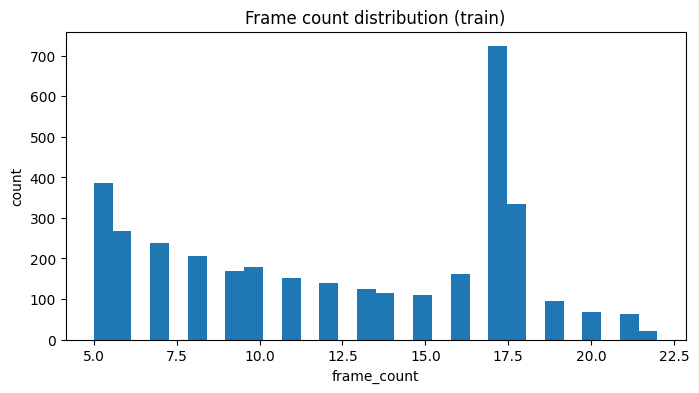

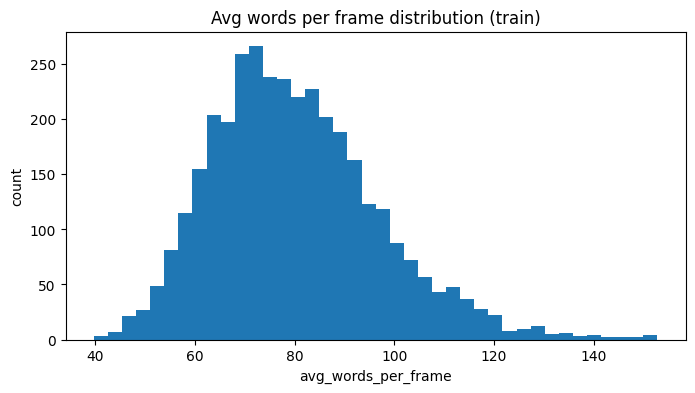

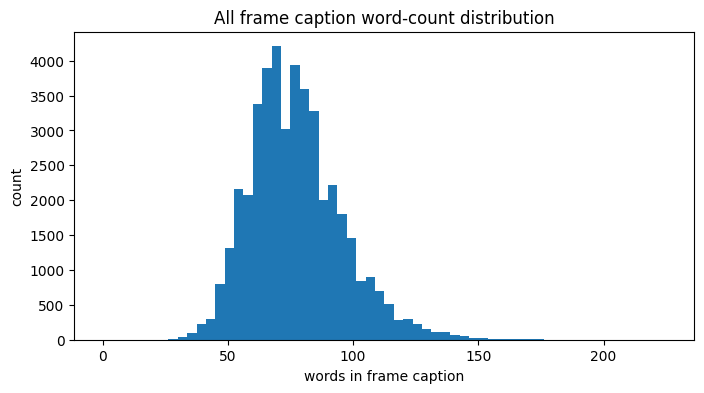

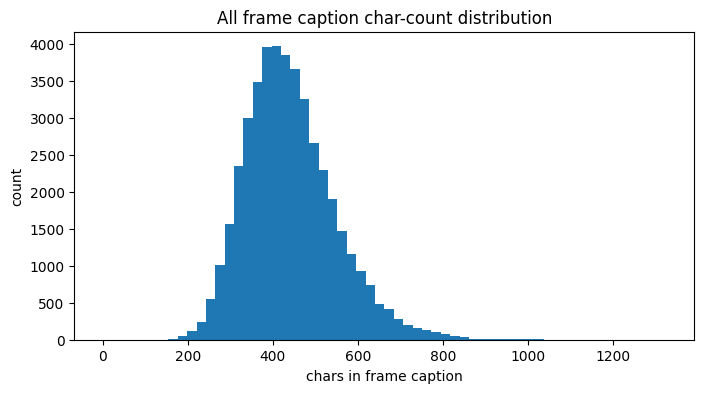

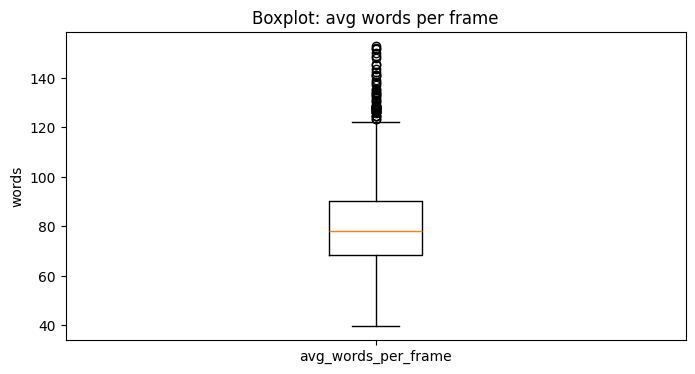

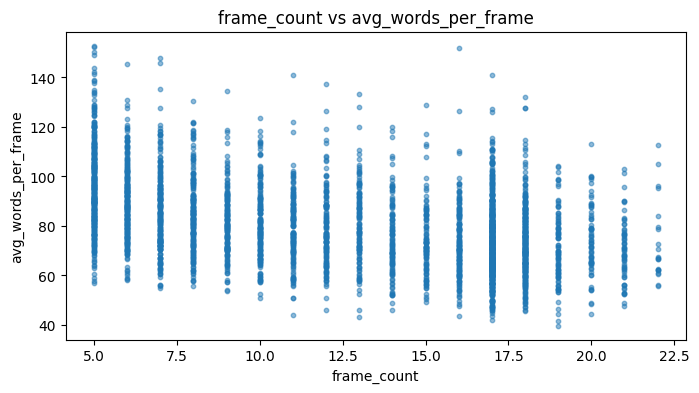

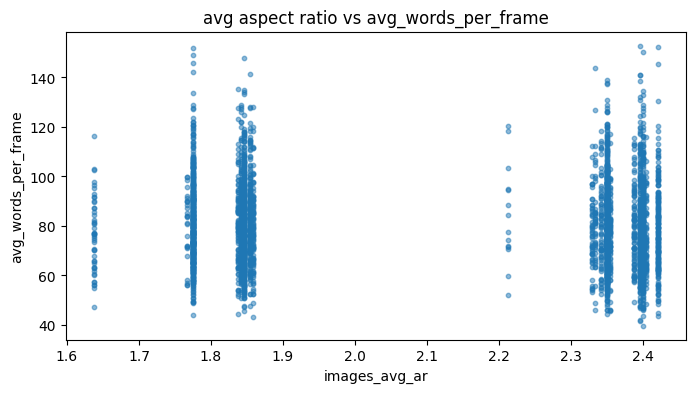

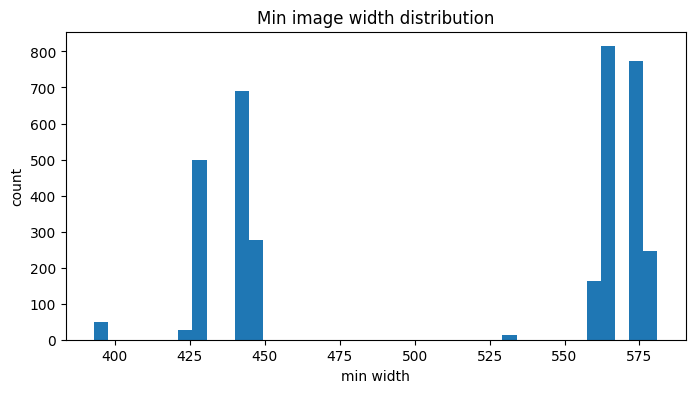

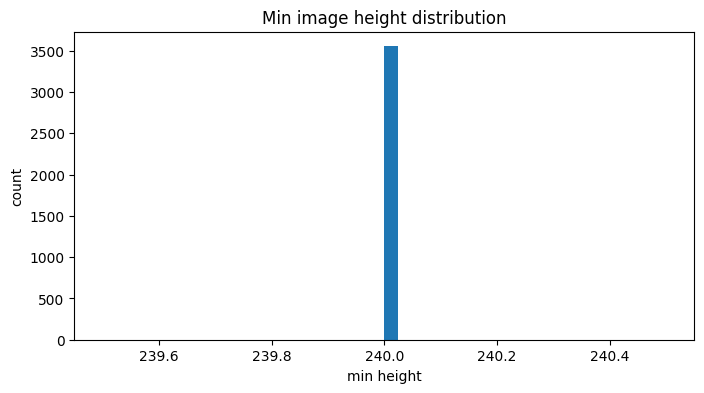

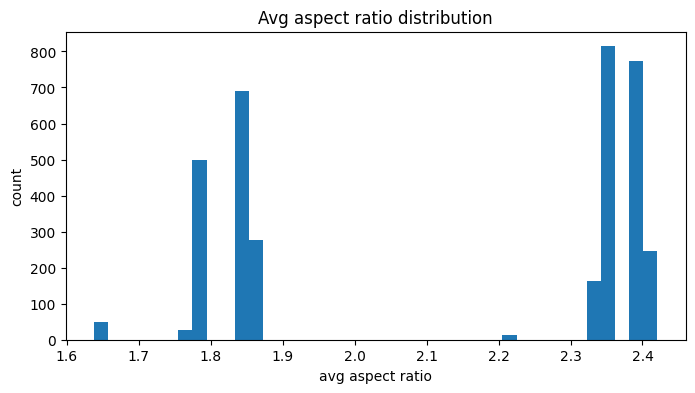

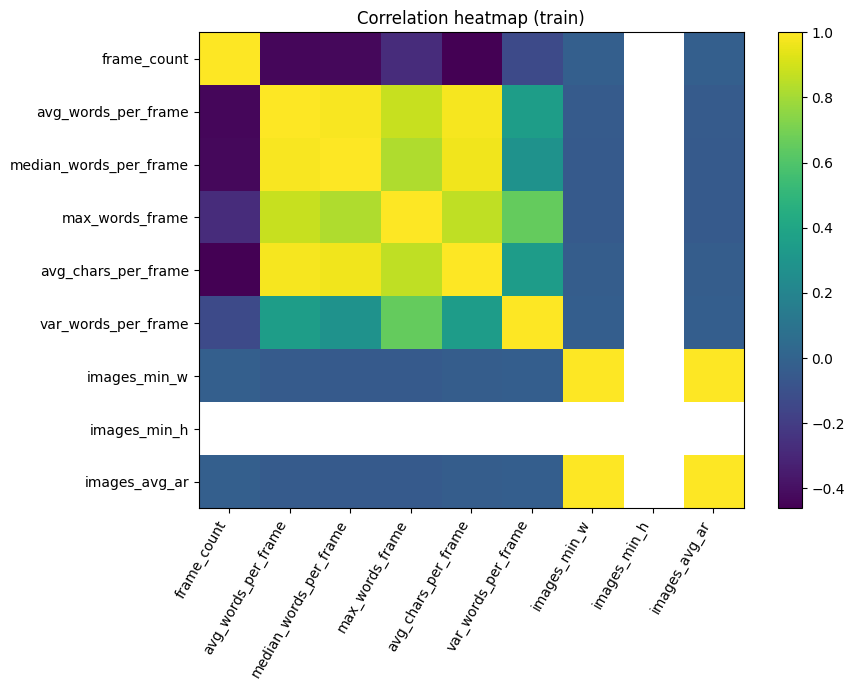

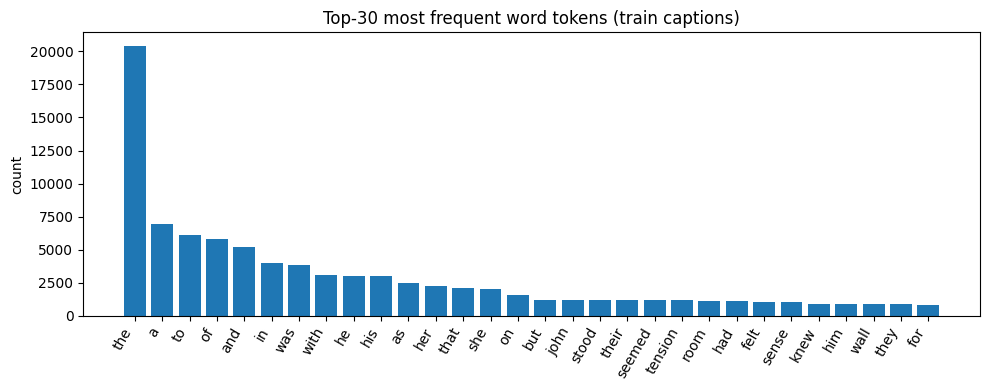

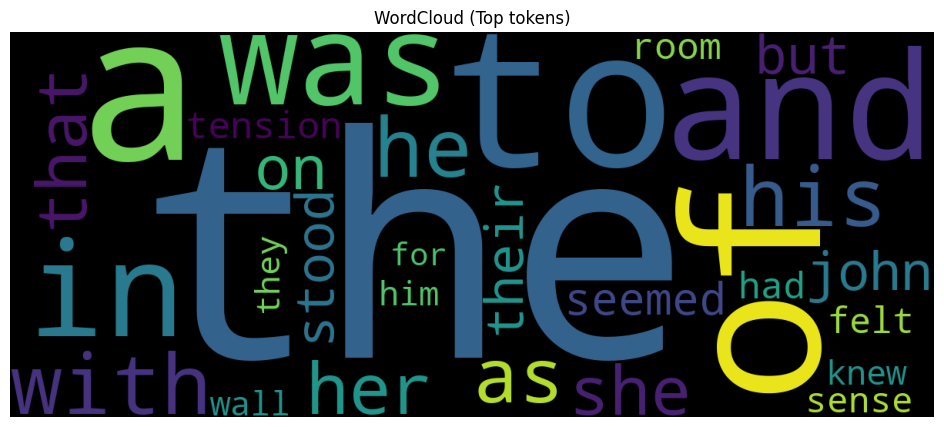

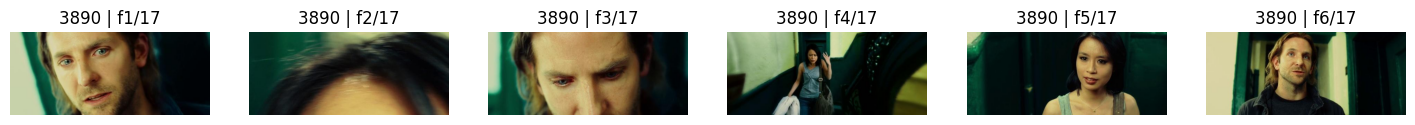

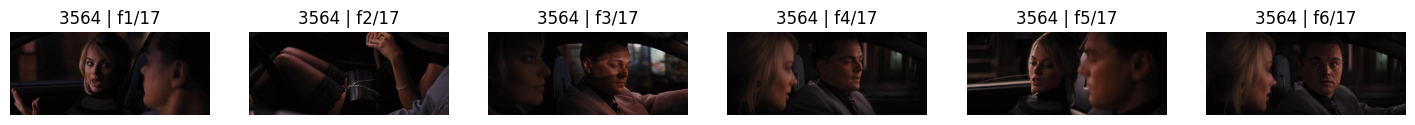

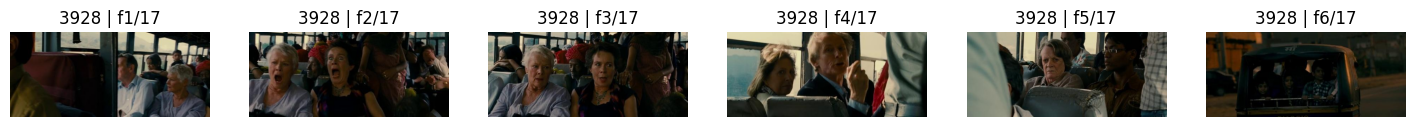


EDA complete. DataFrame df has story-level stats.


In [3]:
# =========================
# Cell 3 — EDA (single heavy cell, many graphs + tqdm)
# - Parses per-frame captions from <gdi imageX> segments
# - Computes story-level + frame-level stats
# - Generates many matplotlib plots
# =========================

import re, math, random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
from collections import Counter
from PIL import Image

# ---------- Parsing helpers ----------
_GDI = re.compile(r"<gdi\s+image(\d+)>", re.IGNORECASE)
_GD_TAGS = re.compile(r"</?gd[ioal]\b[^>]*>", re.IGNORECASE)
_ANY_TAGS = re.compile(r"<[^>]+>")

def strip_grounding_tags(text: str) -> str:
    if text is None:
        return ""
    text = _GD_TAGS.sub("", text)
    text = _ANY_TAGS.sub("", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

def split_story_into_frame_segments(story_text: str):
    if not story_text:
        return {}
    matches = list(_GDI.finditer(story_text))
    if not matches:
        return {}
    segs = {}
    for i, m in enumerate(matches):
        frame_idx = int(m.group(1))
        start = m.end()
        end = matches[i+1].start() if i+1 < len(matches) else len(story_text)
        segs[frame_idx] = story_text[start:end].strip()
    return segs

def get_frame_captions(example):
    frame_count = int(example.get("frame_count", 0))
    segs = split_story_into_frame_segments(example.get("story", ""))
    captions = []
    for i in range(1, frame_count + 1):
        captions.append(strip_grounding_tags(segs.get(i, "")))
    return captions

def word_count(s: str) -> int:
    return len(s.split()) if s else 0

def char_count(s: str) -> int:
    return len(s) if s else 0

# ---------- Aggregate story-level stats ----------
rows = []
frame_word_lengths_all = []
frame_char_lengths_all = []
frame_pos_word_lengths = Counter()  # keyed by frame index
vocab_counter = Counter()

# limit token vocab EDA to avoid exploding compute
MAX_VOCAB_TOKENS = 200_000

pbar = tqdm(range(len(train_hf)), desc="Aggregating EDA stats (train)")
for i in pbar:
    ex = train_hf[i]
    sid = ex["story_id"]
    imgs = ex["images"]
    fc = int(ex["frame_count"])

    caps = get_frame_captions(ex)
    num_images = len(imgs)

    # caption lengths
    wc = [word_count(c) for c in caps]
    cc = [char_count(c) for c in caps]

    # store frame-level distributions
    frame_word_lengths_all.extend(wc)
    frame_char_lengths_all.extend(cc)

    # by frame position (1-indexed)
    for fi, w in enumerate(wc, start=1):
        frame_pos_word_lengths[fi] += w

    # lightweight vocab count (lowercased word tokens)
    # cap token updates to keep runtime bounded
    if sum(vocab_counter.values()) < MAX_VOCAB_TOKENS:
        for c in caps:
            toks = re.findall(r"[A-Za-z']+", c.lower())
            vocab_counter.update(toks)

    # image stats (use first/last/min/max)
    ws, hs, ars = [], [], []
    for im in imgs:
        w, h = im.size
        ws.append(w); hs.append(h)
        ars.append(w / h if h else 0.0)

    rows.append({
        "story_id": sid,
        "frame_count": fc,
        "num_images": num_images,
        "avg_words_per_frame": float(np.mean(wc)) if wc else 0.0,
        "median_words_per_frame": float(np.median(wc)) if wc else 0.0,
        "max_words_frame": int(np.max(wc)) if wc else 0,
        "avg_chars_per_frame": float(np.mean(cc)) if cc else 0.0,
        "var_words_per_frame": float(np.var(wc)) if wc else 0.0,
        "images_min_w": int(np.min(ws)) if ws else 0,
        "images_max_w": int(np.max(ws)) if ws else 0,
        "images_min_h": int(np.min(hs)) if hs else 0,
        "images_max_h": int(np.max(hs)) if hs else 0,
        "images_avg_ar": float(np.mean(ars)) if ars else 0.0,
        "images_var_ar": float(np.var(ars)) if ars else 0.0,
    })

df = pd.DataFrame(rows)
print("\n=== Head ===")
display(df.head())

print("\n=== Summary (numeric) ===")
display(df.describe())

# ---------- Integrity checks ----------
dup_ids = df["story_id"].duplicated().sum()
mismatch = (df["frame_count"] != df["num_images"]).sum()
print("\n=== Integrity checks ===")
print("Duplicate story_id rows:", dup_ids)
print("frame_count != num_images:", mismatch, "/", len(df))
print("Stories with frame_count >= 5:", int((df["frame_count"] >= 5).sum()), "/", len(df))

# ---------- Plots ----------
plt.figure(figsize=(8,4))
plt.hist(df["frame_count"], bins=30)
plt.title("Frame count distribution (train)")
plt.xlabel("frame_count")
plt.ylabel("count")
plt.show()

plt.figure(figsize=(8,4))
plt.hist(df["avg_words_per_frame"], bins=40)
plt.title("Avg words per frame distribution (train)")
plt.xlabel("avg_words_per_frame")
plt.ylabel("count")
plt.show()

plt.figure(figsize=(8,4))
plt.hist(frame_word_lengths_all, bins=60)
plt.title("All frame caption word-count distribution")
plt.xlabel("words in frame caption")
plt.ylabel("count")
plt.show()

plt.figure(figsize=(8,4))
plt.hist(frame_char_lengths_all, bins=60)
plt.title("All frame caption char-count distribution")
plt.xlabel("chars in frame caption")
plt.ylabel("count")
plt.show()

plt.figure(figsize=(8,4))
plt.boxplot(df["avg_words_per_frame"].values, tick_labels=["avg_words_per_frame"])
plt.title("Boxplot: avg words per frame")
plt.ylabel("words")
plt.show()

plt.figure(figsize=(8,4))
plt.scatter(df["frame_count"], df["avg_words_per_frame"], s=10, alpha=0.5)
plt.title("frame_count vs avg_words_per_frame")
plt.xlabel("frame_count")
plt.ylabel("avg_words_per_frame")
plt.show()

plt.figure(figsize=(8,4))
plt.scatter(df["images_avg_ar"], df["avg_words_per_frame"], s=10, alpha=0.5)
plt.title("avg aspect ratio vs avg_words_per_frame")
plt.xlabel("images_avg_ar")
plt.ylabel("avg_words_per_frame")
plt.show()

plt.figure(figsize=(8,4))
plt.hist(df["images_min_w"], bins=40)
plt.title("Min image width distribution")
plt.xlabel("min width")
plt.ylabel("count")
plt.show()

plt.figure(figsize=(8,4))
plt.hist(df["images_min_h"], bins=40)
plt.title("Min image height distribution")
plt.xlabel("min height")
plt.ylabel("count")
plt.show()

plt.figure(figsize=(8,4))
plt.hist(df["images_avg_ar"], bins=40)
plt.title("Avg aspect ratio distribution")
plt.xlabel("avg aspect ratio")
plt.ylabel("count")
plt.show()

# correlation heatmap (matplotlib only)
num_cols = [
    "frame_count","avg_words_per_frame","median_words_per_frame","max_words_frame",
    "avg_chars_per_frame","var_words_per_frame","images_min_w","images_min_h","images_avg_ar"
]
corr = df[num_cols].corr().values
plt.figure(figsize=(9,7))
plt.imshow(corr, aspect="auto")
plt.xticks(range(len(num_cols)), num_cols, rotation=60, ha="right")
plt.yticks(range(len(num_cols)), num_cols)
plt.title("Correlation heatmap (train)")
plt.colorbar()
plt.tight_layout()
plt.show()

# top words bar chart
top_words = vocab_counter.most_common(30)
words, freqs = zip(*top_words) if top_words else ([], [])
plt.figure(figsize=(10,4))
plt.bar(words, freqs)
plt.title("Top-30 most frequent word tokens (train captions)")
plt.xticks(rotation=60, ha="right")
plt.ylabel("count")
plt.tight_layout()
plt.show()

# word cloud (optional visualization; can be slow if vocab huge)
try:
    from wordcloud import WordCloud
    wc = WordCloud(width=1200, height=500).generate_from_frequencies(dict(top_words))
    plt.figure(figsize=(12,5))
    plt.imshow(wc)
    plt.axis("off")
    plt.title("WordCloud (Top tokens)")
    plt.show()
except Exception as e:
    print("WordCloud skipped:", e)



# Image grid samples (random stories)
def show_image_grid(n_stories=3, max_frames=6, seed=42):
    random.seed(seed)
    idxs = random.sample(range(len(train_hf)), k=min(n_stories, len(train_hf)))
    for ix in idxs:
        ex = train_hf[ix]
        imgs = ex["images"]
        fc = int(ex["frame_count"])
        m = min(len(imgs), max_frames)
        plt.figure(figsize=(3*m, 3))
        for j in range(m):
            ax = plt.subplot(1, m, j+1)
            ax.imshow(imgs[j])
            ax.set_title(f"{ex['story_id']} | f{j+1}/{fc}")
            ax.axis("off")
        plt.show()

show_image_grid(n_stories=3, max_frames=6)

print("\nEDA complete. DataFrame df has story-level stats.")


In [4]:
# =========================
# Cell 4 — Config + seeds + output folders (all inside ./data)
# =========================

import os, json, time, random
import numpy as np
import torch
from pathlib import Path

PROJECT_DIR = Path.cwd()
DATA_DIR = PROJECT_DIR / "data"
RUN_DIR = DATA_DIR / "runs" / time.strftime("%Y%m%d-%H%M%S")
RUN_DIR.mkdir(parents=True, exist_ok=True)

K = 4
SEED = 42
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
if DEVICE == "cuda":
    torch.cuda.manual_seed_all(SEED)

print("RUN_DIR:", RUN_DIR)
print("DEVICE:", DEVICE)


RUN_DIR: e:\DNN-ms\Abin - Project 4\notebooks\data\runs\20251228-101920
DEVICE: cuda


In [5]:
# =========================
# Cell 5 — RAM-safe split by story_id (stratified by frame_count bins)
# - stores only indices, does not copy images
# =========================

import pandas as pd
from tqdm.auto import tqdm

def has_k_plus_1(ex):
    return int(ex["frame_count"]) >= (K + 1)

train_ok = train_hf.filter(has_k_plus_1)
print("Train usable (>=K+1):", len(train_ok), "/", len(train_hf))

# Build id table (minimal fields)
idxs = list(range(len(train_ok)))
story_ids = []
frame_counts = []

pbar = tqdm(idxs, desc="Building split index table")
for i in pbar:
    ex = train_ok[i]
    story_ids.append(ex["story_id"])
    frame_counts.append(int(ex["frame_count"]))

df_ids = pd.DataFrame({"idx": idxs, "story_id": story_ids, "frame_count": frame_counts})
df_ids["len_bin"] = pd.cut(df_ids["frame_count"], bins=[0,7,11,15,100], labels=["5-7","8-11","12-15","16+"])

# shuffle
df_ids = df_ids.sample(frac=1.0, random_state=SEED).reset_index(drop=True)

train_idx, val_idx, test_idx = [], [], []
for _, group in df_ids.groupby("len_bin", observed=False):
    g = group["idx"].tolist()
    n = len(g)
    n_train = int(round(0.80 * n))
    n_val   = int(round(0.10 * n))
    train_idx += g[:n_train]
    val_idx   += g[n_train:n_train+n_val]
    test_idx  += g[n_train+n_val:]

print("Split sizes:", len(train_idx), len(val_idx), len(test_idx), "sum:", len(train_idx)+len(val_idx)+len(test_idx))

# persist split indices
split_path = RUN_DIR / "splits.json"
with open(split_path, "w", encoding="utf-8") as f:
    json.dump({"train_idx": train_idx, "val_idx": val_idx, "test_idx": test_idx, "K": K}, f)
print("Saved splits to:", split_path)


Train usable (>=K+1): 3552 / 3552


Building split index table: 100%|██████████| 3552/3552 [00:19<00:00, 179.41it/s]

Split sizes: 2841 355 356 sum: 3552
Saved splits to: e:\DNN-ms\Abin - Project 4\notebooks\data\runs\20251228-101920\splits.json


In [6]:
# =========================
# Cell 6 — PyTorch Dataset/Dataloaders (on-the-fly, no RAM blowup)
# - uses your EDA parsing helpers: get_frame_captions() must exist
# =========================

from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

img_tf = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),   # float [0,1]
])

class StoryKPlus1(Dataset):
    def __init__(self, hf_ds, indices, K=4, img_tf=None):
        self.hf_ds = hf_ds
        self.indices = indices
        self.K = K
        self.img_tf = img_tf

    def __len__(self):
        return len(self.indices)

    def __getitem__(self, i):
        ex = self.hf_ds[self.indices[i]]
        caps = get_frame_captions(ex)
        imgs = ex["images"]

        ctx_imgs = imgs[:self.K]
        tgt_img  = imgs[self.K]

        if self.img_tf is not None:
            ctx_imgs = torch.stack([self.img_tf(im.convert("RGB")) for im in ctx_imgs], dim=0)  # (K,3,224,224)
            tgt_img  = self.img_tf(tgt_img.convert("RGB"))  # (3,224,224)

        return {
            "story_id": ex["story_id"],
            "frame_count": int(ex["frame_count"]),
            "ctx_images": ctx_imgs,
            "ctx_captions": caps[:self.K],
            "tgt_image": tgt_img,
            "tgt_caption": caps[self.K],
        }

def collate_fn(batch):
    ctx_images = torch.stack([b["ctx_images"] for b in batch], dim=0)  # (B,K,3,224,224)
    tgt_image  = torch.stack([b["tgt_image"] for b in batch], dim=0)   # (B,3,224,224)
    return {
        "story_id": [b["story_id"] for b in batch],
        "frame_count": torch.tensor([b["frame_count"] for b in batch]),
        "ctx_images": ctx_images,
        "tgt_image": tgt_image,
        "ctx_captions": [b["ctx_captions"] for b in batch],  # list[list[str]]
        "tgt_caption": [b["tgt_caption"] for b in batch],    # list[str]
    }

BATCH = 2  # T4-safe
NUM_WORKERS = 0
PIN_MEMORY = False

ds_train = StoryKPlus1(train_ok, train_idx, K=K, img_tf=img_tf)
ds_val   = StoryKPlus1(train_ok, val_idx,   K=K, img_tf=img_tf)
ds_test  = StoryKPlus1(train_ok, test_idx,  K=K, img_tf=img_tf)

dl_train = DataLoader(ds_train, batch_size=BATCH, shuffle=True,  num_workers=NUM_WORKERS, pin_memory=PIN_MEMORY, collate_fn=collate_fn)
dl_val   = DataLoader(ds_val,   batch_size=BATCH, shuffle=False, num_workers=NUM_WORKERS, pin_memory=PIN_MEMORY, collate_fn=collate_fn)
dl_test  = DataLoader(ds_test,  batch_size=BATCH, shuffle=False, num_workers=NUM_WORKERS, pin_memory=PIN_MEMORY, collate_fn=collate_fn)

b = next(iter(dl_train))
print("ctx_images:", b["ctx_images"].shape, "tgt_image:", b["tgt_image"].shape)
print("example tgt caption:", b["tgt_caption"][0][:120], "...")


ctx_images: torch.Size([2, 4, 3, 224, 224]) tgt_image: torch.Size([2, 3, 224, 224])
example tgt caption: Inside the treasure room, the boy found himself surrounded by walls adorned with ancient symbols and curtains that seeme ...


In [7]:
# =========================
# Cell 7 — Load models (cached to ./data) + CLIP embedding helpers
# =========================

import torch.nn.functional as F
from transformers import CLIPModel, CLIPProcessor, AutoTokenizer, AutoModelForCausalLM

clip_name = "openai/clip-vit-base-patch32"
gpt_name  = "gpt2"

clip = CLIPModel.from_pretrained(
    "openai/clip-vit-base-patch32",
    cache_dir=os.environ["TRANSFORMERS_CACHE"],
    use_safetensors=True,
).to(DEVICE).eval()
clip_processor = CLIPProcessor.from_pretrained(clip_name, cache_dir=os.environ["TRANSFORMERS_CACHE"])

tok = AutoTokenizer.from_pretrained(gpt_name, cache_dir=os.environ["TRANSFORMERS_CACHE"])
if tok.pad_token is None:
    tok.pad_token = tok.eos_token

gpt = AutoModelForCausalLM.from_pretrained(
    gpt_name,
    cache_dir=os.environ["TRANSFORMERS_CACHE"],
    use_safetensors=True,
).to(DEVICE)


for p in clip.parameters():
    p.requires_grad = False

CLIP_MEAN = torch.tensor([0.48145466, 0.45782750, 0.40821073], device=DEVICE).view(1,3,1,1)
CLIP_STD  = torch.tensor([0.26862954, 0.26130258, 0.27577711], device=DEVICE).view(1,3,1,1)

@torch.no_grad()
def clip_image_emb(img_bchw_01):
    x = (img_bchw_01.to(DEVICE) - CLIP_MEAN) / CLIP_STD
    e = clip.get_image_features(pixel_values=x)
    return F.normalize(e, dim=-1)

@torch.no_grad()
def clip_text_emb(text_list):
    inputs = clip_processor(text=text_list, return_tensors="pt", padding=True, truncation=True)
    inputs = {k: v.to(DEVICE) for k, v in inputs.items()}
    e = clip.get_text_features(input_ids=inputs["input_ids"], attention_mask=inputs["attention_mask"])
    return F.normalize(e, dim=-1)

print("Models loaded. Caches are in:", os.environ["TRANSFORMERS_CACHE"])


e:\DNN-ms\Abin - Project 4\.venv\Lib\site-packages\transformers\utils\hub.py:110: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


Models loaded. Caches are in: e:\DNN-ms\Abin - Project 4\notebooks\data\transformers


In [8]:
# =========================
# Cell 8 — Prompt formatting + robust target-first tokenization (prevents NaNs)
# =========================

MAX_LEN = 256
MAX_TGT_TOK = 64
MAX_CTX_WORDS = 25

def compress_caption(c, max_words=MAX_CTX_WORDS):
    if not c:
        return ""
    w = c.split()
    return " ".join(w[:max_words])

def format_prompt(ctx_caps):
    lines = [f"{i+1}: {compress_caption(c)}" for i, c in enumerate(ctx_caps)]
    return "CTX\n" + "\n".join(lines) + "\nNEXT:"

def tokenize_batch(ctx_caps_batch, tgt_caps_batch):
    input_ids_list, labels_list = [], []

    for ctx_caps, tgt in zip(ctx_caps_batch, tgt_caps_batch):
        prompt = format_prompt(ctx_caps)
        tgt = tgt if isinstance(tgt, str) else ""

        t_ids = tok(tgt, truncation=True, max_length=MAX_TGT_TOK, add_special_tokens=False)["input_ids"]
        if len(t_ids) == 0:
            t_ids = [tok.eos_token_id]

        prompt_budget = MAX_LEN - len(t_ids)
        if prompt_budget < 1:
            p_ids = []
            t_ids = t_ids[:MAX_LEN]
        else:
            p_ids = tok(prompt, truncation=True, max_length=prompt_budget, add_special_tokens=False)["input_ids"]

        ids = p_ids + t_ids
        labs = ([-100] * len(p_ids)) + t_ids

        input_ids_list.append(torch.tensor(ids, dtype=torch.long))
        labels_list.append(torch.tensor(labs, dtype=torch.long))

    max_b = max(x.size(0) for x in input_ids_list)
    input_ids = torch.full((len(input_ids_list), max_b), tok.pad_token_id, dtype=torch.long)
    labels    = torch.full((len(labels_list),    max_b), -100,            dtype=torch.long)
    attn_mask = torch.zeros((len(input_ids_list), max_b), dtype=torch.long)

    for i, (ids, lab) in enumerate(zip(input_ids_list, labels_list)):
        n = ids.size(0)
        input_ids[i, :n] = ids
        labels[i, :n]    = lab
        attn_mask[i, :n] = 1

    return {"input_ids": input_ids, "attention_mask": attn_mask, "labels": labels}


In [9]:
# =========================
# Cell 9 — Generator (G): Shared encoder + GPT-2 prefix + CLIP-embedding image head (Project5 base)
# (same backbone as Project4 v2; used for warmup + GAN fine-tune)
# =========================

import torch.nn as nn

MAX_CTX_WORDS_CLIP = 25
def compress_for_clip(c, max_words=MAX_CTX_WORDS_CLIP):
    if not c:
        return ""
    w = c.split()
    return " ".join(w[:max_words])

class SharedEncoder(nn.Module):
    def __init__(self, d_model=256, n_layers=2, n_heads=4, dropout=0.1):
        super().__init__()
        self.fuse = nn.Sequential(
            nn.Linear(512 + 512, d_model),
            nn.ReLU(),
            nn.Dropout(dropout),
        )
        enc_layer = nn.TransformerEncoderLayer(
            d_model=d_model, nhead=n_heads, dim_feedforward=d_model*4,
            dropout=dropout, batch_first=True, activation="gelu"
        )
        self.temporal = nn.TransformerEncoder(enc_layer, num_layers=n_layers)

    def forward(self, ctx_images_bkchw, ctx_caps_list):
        B, K_, C, H, W = ctx_images_bkchw.shape
        imgs = ctx_images_bkchw.reshape(B*K_, C, H, W)

        with torch.no_grad():
            e_img = clip_image_emb(imgs)

        flat_caps = []
        for caps in ctx_caps_list:
            for c in caps:
                flat_caps.append(compress_for_clip(c))

        with torch.no_grad():
            e_txt = clip_text_emb(flat_caps)

        h = self.fuse(torch.cat([e_img, e_txt], dim=-1)).reshape(B, K_, -1)
        h = self.temporal(h)
        return h.mean(dim=1)  # z

class PrefixGPT2(nn.Module):
    def __init__(self, gpt_model, d_z=256, n_prefix=8):
        super().__init__()
        self.gpt = gpt_model
        self.n_prefix = n_prefix
        self.z_to_prefix = nn.Linear(d_z, n_prefix * self.gpt.config.n_embd)

    def forward(self, input_ids, attention_mask, labels, z):
        B, T = input_ids.shape
        tok_emb = self.gpt.transformer.wte(input_ids.to(DEVICE))
        prefix = self.z_to_prefix(z).view(B, self.n_prefix, -1)
        inputs_embeds = torch.cat([prefix, tok_emb], dim=1)

        prefix_mask = torch.ones((B, self.n_prefix), dtype=attention_mask.dtype, device=DEVICE)
        attn = torch.cat([prefix_mask, attention_mask.to(DEVICE)], dim=1)

        prefix_labels = torch.full((B, self.n_prefix), -100, dtype=labels.dtype, device=DEVICE)
        lab = torch.cat([prefix_labels, labels.to(DEVICE)], dim=1)

        out = self.gpt(
            inputs_embeds=inputs_embeds,
            attention_mask=attn,
            labels=lab,
            use_cache=False,
        )
        return out.loss

class GeneratorG(nn.Module):
    def __init__(self, d_model=256, n_prefix=8):
        super().__init__()
        self.encoder = SharedEncoder(d_model=d_model)
        self.textdec = PrefixGPT2(gpt, d_z=d_model, n_prefix=n_prefix)
        self.img_head = nn.Sequential(
            nn.Linear(d_model, d_model),
            nn.ReLU(),
            nn.Linear(d_model, 512),
        )

    def forward(self, batch):
        ctx_images = batch["ctx_images"].to(DEVICE)
        tgt_image  = batch["tgt_image"].to(DEVICE)

        z = self.encoder(ctx_images, batch["ctx_captions"])

        enc = tokenize_batch(batch["ctx_captions"], batch["tgt_caption"])
        text_loss = self.textdec(enc["input_ids"], enc["attention_mask"], enc["labels"], z)

        with torch.no_grad():
            tgt_img_emb = clip_image_emb(tgt_image)

        pred_img_emb = F.normalize(self.img_head(z), dim=-1)
        img_loss = F.mse_loss(pred_img_emb, tgt_img_emb)

        with torch.no_grad():
            gt_txt_emb = clip_text_emb(batch["tgt_caption"])
        align_loss = (1.0 - (pred_img_emb * gt_txt_emb).sum(dim=-1)).mean()

        return text_loss, img_loss, align_loss, pred_img_emb, z

G = GeneratorG(d_model=256, n_prefix=8).to(DEVICE)

# freeze CLIP (already) and keep GPT-2 mostly frozen (prefix-only training first)
for p in G.textdec.gpt.parameters():
    p.requires_grad = False

print("Generator G ready.")


Generator G ready.


In [10]:
# =========================
# Cell 10 — Discriminator (D_pair): real vs fake (tgt_img_emb, caption_emb)
# GAN-style hinge loss in CLIP embedding space
# =========================

class DPair(nn.Module):
    def __init__(self, in_dim=1024, hidden=512, dropout=0.1):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_dim, hidden),
            nn.LeakyReLU(0.2),
            nn.Dropout(dropout),
            nn.Linear(hidden, hidden),
            nn.LeakyReLU(0.2),
            nn.Dropout(dropout),
            nn.Linear(hidden, 1),
        )

    def forward(self, img_emb_512, txt_emb_512):
        x = torch.cat([img_emb_512, txt_emb_512], dim=-1)
        return self.net(x).squeeze(-1)  # (B,)

D = DPair().to(DEVICE)

def d_hinge_loss(d_real, d_fake):
    return torch.relu(1.0 - d_real).mean() + torch.relu(1.0 + d_fake).mean()

def g_hinge_loss(d_fake):
    return (-d_fake).mean()

print("Discriminator D_pair ready.")


Discriminator D_pair ready.


# RUN TILL BELOW CELL INCASE OF RESTART 

In [11]:
import torch
ckpt = torch.load(r"e:\\DNN-ms\\Abin - Project 4\\notebooks\\data\\runs\\20251227-131543\\GAN_improved.pt", map_location=DEVICE)
G.load_state_dict(ckpt["G"], strict=True)
D.load_state_dict(ckpt["D"], strict=True)
print("Loaded GAN_improved checkpoint.")


C:\Users\shaido\AppData\Local\Temp\ipykernel_22348\3539081240.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(r"e:\\DNN-ms\\Abin - Project 4\\notebooks

Loaded GAN_improved checkpoint.


In [12]:
# =========================
# Cell 11 — Warmup training (no GAN): G with L_txt + α L_img + λ L_align
# =========================

from torch.amp import autocast, GradScaler
from tqdm.auto import tqdm

alpha_img = 0.5
lambda_align = 0.5

g_params = [p for p in G.parameters() if p.requires_grad]
g_opt = torch.optim.AdamW(g_params, lr=2e-4)
scaler = GradScaler("cuda", enabled=(DEVICE == "cuda"))

def train_warmup_epoch(dl, train=True):
    G.train(train)
    total = {"txt":0.0, "img":0.0, "align":0.0, "tot":0.0}
    n = 0
    pbar = tqdm(dl, desc=("warmup-train" if train else "warmup-val"))
    for batch in pbar:
        with autocast("cuda", enabled=(DEVICE=="cuda")):
            txt_loss, img_loss, align_loss, _, _ = G(batch)
            loss = txt_loss + alpha_img*img_loss + lambda_align*align_loss

        if train:
            g_opt.zero_grad(set_to_none=True)
            scaler.scale(loss).backward()
            scaler.unscale_(g_opt)
            torch.nn.utils.clip_grad_norm_(g_params, 1.0)
            scaler.step(g_opt)
            scaler.update()

        bs = batch["tgt_image"].shape[0]
        total["txt"] += float(txt_loss.detach()) * bs
        total["img"] += float(img_loss.detach()) * bs
        total["align"] += float(align_loss.detach()) * bs
        total["tot"] += float(loss.detach()) * bs
        n += bs
        pbar.set_postfix(tot=total["tot"]/n, txt=total["txt"]/n, img=total["img"]/n, al=total["align"]/n)

    for k in total:
        total[k] /= max(n,1)
    return total

WARMUP_EPOCHS = 2
for ep in range(1, WARMUP_EPOCHS+1):
    tr = train_warmup_epoch(dl_train, train=True)
    va = train_warmup_epoch(dl_val, train=False)
    print(f"Warmup Epoch {ep} | train:", tr, "| val:", va)

# save warmup checkpoint
torch.save({"G": G.state_dict()}, RUN_DIR / "G_warmup.pt")
print("Saved:", RUN_DIR / "G_warmup.pt")


warmup-val: 100%|██████████| 178/178 [00:14<00:00, 12.44it/s, al=0.156, img=0.00295, tot=2.62, txt=2.54]


Warmup Epoch 1 | train: {'txt': 2.8017155618073444, 'img': 0.002965796057827212, 'align': 0.16596073361191688, 'tot': 2.8861788243149755} | val: {'txt': 2.5443822679385333, 'img': 0.0029451605562173144, 'align': 0.15599944406831767, 'tot': 2.6238545793882557}


warmup-val: 100%|██████████| 178/178 [00:14<00:00, 12.54it/s, al=0.156, img=0.00298, tot=2.6, txt=2.52] 


Warmup Epoch 2 | train: {'txt': 2.7218470913303943, 'img': 0.0029587937004776363, 'align': 0.15053700955977367, 'tot': 2.7985949921633146} | val: {'txt': 2.518592076906016, 'img': 0.002982067947708805, 'align': 0.15563039796453126, 'tot': 2.5978983059735365}
Saved: e:\DNN-ms\Abin - Project 4\notebooks\data\runs\20251227-131543\G_warmup.pt


In [13]:
# =========================
# Cell 12 — Adversarial fine-tune: alternate D and G updates
# - Real: (tgt_img_emb, CLIP_text(gt_caption))
# - Fake: (tgt_img_emb, CLIP_text(generated_caption))  [stronger but slower]
# Practical compromise: Fake uses GT caption embedding early, then switch to generated later
# Here: start with fake_txt = CLIP_text(generated) for true GAN signal
# =========================

beta_adv = 0.2          # adversarial weight (start small)
D_STEPS = 1
G_STEPS = 1

d_opt = torch.optim.AdamW(D.parameters(), lr=2e-4)

@torch.no_grad()
def generate_caption_one(ctx_images_1k, ctx_caps_1k, max_new_tokens=48):
    G.eval()
    z = G.encoder(ctx_images_1k.to(DEVICE), [ctx_caps_1k])

    prompt = format_prompt(ctx_caps_1k)
    inp = tok(prompt, return_tensors="pt", add_special_tokens=False).to(DEVICE)
    pid = inp["input_ids"]
    am  = inp["attention_mask"]

    prefix = G.textdec.z_to_prefix(z).view(1, G.textdec.n_prefix, -1)
    tok_emb = G.textdec.gpt.transformer.wte(pid)
    inputs_embeds = torch.cat([prefix, tok_emb], dim=1)

    prefix_mask = torch.ones((1, G.textdec.n_prefix), dtype=am.dtype, device=DEVICE)
    am2 = torch.cat([prefix_mask, am], dim=1)

    out_ids = G.textdec.gpt.generate(
        inputs_embeds=inputs_embeds,
        attention_mask=am2,
        max_new_tokens=max_new_tokens,
        do_sample=False,
        repetition_penalty=1.15,
        no_repeat_ngram_size=3,
        eos_token_id=tok.eos_token_id,
        pad_token_id=tok.eos_token_id,
    )
    full = tok.decode(out_ids[0], skip_special_tokens=True)
    pred = full.split("NEXT:", 1)[-1].strip() if "NEXT:" in full else full.replace(prompt, "", 1).strip()
    return pred if pred.strip() else " "

def adv_epoch(dl, train=True):
    G.train(train)
    D.train(train)

    meters = {"d":0.0, "g_adv":0.0, "txt":0.0, "img":0.0, "align":0.0, "g_tot":0.0}
    n = 0

    pbar = tqdm(dl, desc=("adv-train" if train else "adv-val"))
    for batch in pbar:
        bs = batch["tgt_image"].shape[0]
        ctx_images = batch["ctx_images"].to(DEVICE)
        tgt_image  = batch["tgt_image"].to(DEVICE)

        # precompute image emb for D
        with torch.no_grad():
            tgt_img_emb = clip_image_emb(tgt_image)                  # (B,512)
            real_txt_emb = clip_text_emb(batch["tgt_caption"])       # (B,512)

        # --- D steps ---
        if train:
            for _ in range(D_STEPS):
                # fake text from generation (true adversarial signal)
                preds = []
                for i in range(bs):
                    pred = generate_caption_one(ctx_images[i:i+1], batch["ctx_captions"][i], max_new_tokens=48)
                    preds.append(pred)
                with torch.no_grad():
                    fake_txt_emb = clip_text_emb(preds)

                d_real = D(tgt_img_emb, real_txt_emb)
                d_fake = D(tgt_img_emb, fake_txt_emb)
                d_loss = d_hinge_loss(d_real, d_fake)

                d_opt.zero_grad(set_to_none=True)
                d_loss.backward()
                torch.nn.utils.clip_grad_norm_(D.parameters(), 1.0)
                d_opt.step()
        else:
            d_loss = torch.tensor(0.0, device=DEVICE)

        # --- G steps ---
        with autocast("cuda", enabled=(DEVICE=="cuda")):
            txt_loss, img_loss, align_loss, pred_img_emb, _ = G(batch)

            # for G_adv: use same fake_txt_emb approach (generated)
            preds = []
            for i in range(bs):
                pred = generate_caption_one(ctx_images[i:i+1], batch["ctx_captions"][i], max_new_tokens=48)
                preds.append(pred)
            fake_txt_emb = clip_text_emb(preds)

            d_fake_for_g = D(tgt_img_emb.detach(), fake_txt_emb)  # detach img emb path
            g_adv = g_hinge_loss(d_fake_for_g)

            g_total = txt_loss + alpha_img*img_loss + lambda_align*align_loss + beta_adv*g_adv

        if train:
            g_opt.zero_grad(set_to_none=True)
            scaler.scale(g_total).backward()
            scaler.unscale_(g_opt)
            torch.nn.utils.clip_grad_norm_(g_params, 1.0)
            scaler.step(g_opt)
            scaler.update()

        meters["d"] += float(d_loss.detach()) * bs
        meters["g_adv"] += float(g_adv.detach()) * bs
        meters["txt"] += float(txt_loss.detach()) * bs
        meters["img"] += float(img_loss.detach()) * bs
        meters["align"] += float(align_loss.detach()) * bs
        meters["g_tot"] += float(g_total.detach()) * bs
        n += bs

        pbar.set_postfix(
            d=meters["d"]/n, g_tot=meters["g_tot"]/n, g_adv=meters["g_adv"]/n,
            txt=meters["txt"]/n, al=meters["align"]/n
        )

    for k in meters:
        meters[k] /= max(n,1)
    return meters

ADV_EPOCHS = 2
for ep in range(1, ADV_EPOCHS+1):
    tr = adv_epoch(dl_train, train=True)
    va = adv_epoch(dl_val, train=False)
    print(f"Adv Epoch {ep} | train:", tr, "| val:", va)

torch.save({"G": G.state_dict(), "D": D.state_dict()}, RUN_DIR / "GAN_final.pt")
print("Saved:", RUN_DIR / "GAN_final.pt")


adv-val: 100%|██████████| 178/178 [03:23<00:00,  1.14s/it, al=0.154, d=0, g_adv=1.94, g_tot=2.89, txt=2.43]


Adv Epoch 1 | train: {'d': 0.1833552314504189, 'g_adv': 1.5791174174613913, 'txt': 2.4490387550503048, 'img': 0.002959261652454603, 'align': 0.14976477828591442, 'g_tot': 2.8412271086408487} | val: {'d': 0.0, 'g_adv': 1.9357669454225352, 'txt': 2.426442011980943, 'img': 0.002959438116276558, 'align': 0.15416296787664924, 'g_tot': 2.8921593619064545}


adv-val: 100%|██████████| 178/178 [03:30<00:00,  1.18s/it, al=0.155, d=0, g_adv=2.01, g_tot=2.98, txt=2.5] 


Adv Epoch 2 | train: {'d': 0.09869999721494203, 'g_adv': 1.9723282370589141, 'txt': 2.590008350754657, 'img': 0.002963205722096058, 'align': 0.15615477722658735, 'g_tot': 3.0640304461200234} | val: {'d': 0.0, 'g_adv': 2.0086872799295774, 'txt': 2.5028431680840506, 'img': 0.0029771932256473623, 'align': 0.15540619349815477, 'g_tot': 2.983790608526955}
Saved: e:\DNN-ms\Abin - Project 4\notebooks\data\runs\20251227-131543\GAN_final.pt


In [14]:
# =========================
# Cell 13 — Metrics: CLIPScore(gen) on val/test with tqdm
# =========================

import numpy as np
from tqdm.auto import tqdm

@torch.no_grad()
def clipscore_generated(dl, n_batches=30, max_new_tokens=48):
    G.eval()
    scores = []
    it = iter(dl)
    total = min(n_batches, len(dl))
    pbar = tqdm(range(total), desc="CLIPScore(gen)")
    for _ in pbar:
        batch = next(it)
        bs = batch["tgt_image"].shape[0]
        tgt_img_emb = clip_image_emb(batch["tgt_image"].to(DEVICE))

        preds = []
        for i in range(bs):
            pred = generate_caption_one(batch["ctx_images"][i:i+1].to(DEVICE), batch["ctx_captions"][i], max_new_tokens=max_new_tokens)
            preds.append(pred)

        pred_txt_emb = clip_text_emb(preds)
        cos = (tgt_img_emb * pred_txt_emb).sum(dim=-1).detach().cpu().numpy()
        scores.extend(cos.tolist())
        pbar.set_postfix(mean=float(np.mean(scores)))
    return float(np.mean(scores))

val_clip = clipscore_generated(dl_val, n_batches=30)
test_clip = clipscore_generated(dl_test, n_batches=30)

metrics_path = RUN_DIR / "metrics.json"
with open(metrics_path, "w", encoding="utf-8") as f:
    json.dump({"val_clipscore_gen": val_clip, "test_clipscore_gen": test_clip}, f, indent=2)

print("VAL CLIPScore(gen):", val_clip)
print("TEST CLIPScore(gen):", test_clip)
print("Saved metrics to:", metrics_path)


CLIPScore(gen): 100%|██████████| 30/30 [00:28<00:00,  1.06it/s, mean=0.245]

VAL CLIPScore(gen): 0.24676568458477657
TEST CLIPScore(gen): 0.2453034597138564
Saved metrics to: e:\DNN-ms\Abin - Project 4\notebooks\data\runs\20251227-131543\metrics.json


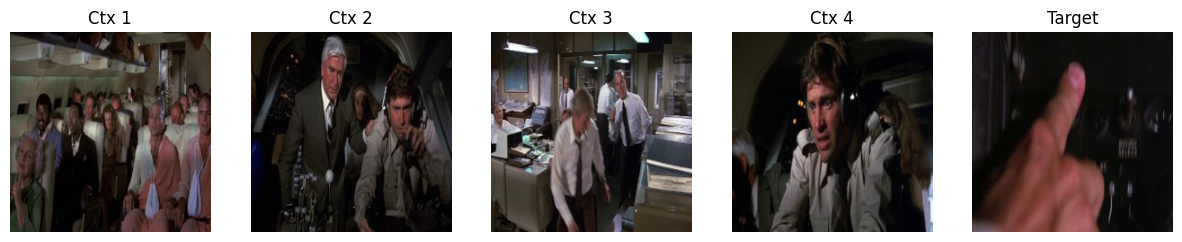

GT: The turning point came when Mr. Brown manipulated the controls on the Control panel. Every movement Mr. Brown's made was precise, his fingers moving with a practiced ease. The cockpit, now dimly lit, was a shadowy place, with the focus solely on Mr. Brown's actions. As Mr. Brown pressed the switch, a sense of relief washed over him. The anomaly had been resolved, and the flight was back on track. The Mr. Brown's eyes met Captain James's, and for a moment, they shared a silent understanding. The  

PRED: The situation escalated as Co-pilot Smith, with his tie still neatly tied and the tension rising again. Mr.-Wilson stood near a desk in the dispatch office; he was focused on the controls but couldn't help himself. The weight of responsibility placed him at risk for any future mishaps. 

CLIP cos (GT): 0.26883822679519653 | (PRED): 0.2497943639755249
--------------------------------------------------------------------------------


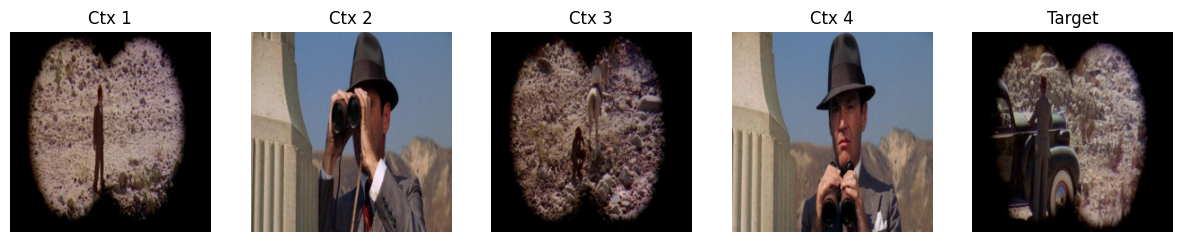

GT: As the tension escalated, a new element was introduced. The Traveler appeared beside a vintage car, standing as a symbol of potential escape. The desolation of the rocky terrain seemed to fade as he inspected the vehicle, his curiosity piqued. He pondered the possibilities, wondering if the car could be the means of their salvation. Would he be able to help The Stranger and The Beggar? The future was uncertain, but one thing was clear – the arrival of The Traveler had brought a turning point in  

PRED: The Stranger continued to watch through binoculars, his eyes fixed on the landscape. The mountains and hills in front of him were a stark contrast with the desolate backdrop that surrounded them; A distant voice spoke from behind the monument. "We must not let this happen again," The Observer said as he 

CLIP cos (GT): 0.2661631107330322 | (PRED): 0.2829119861125946
--------------------------------------------------------------------------------


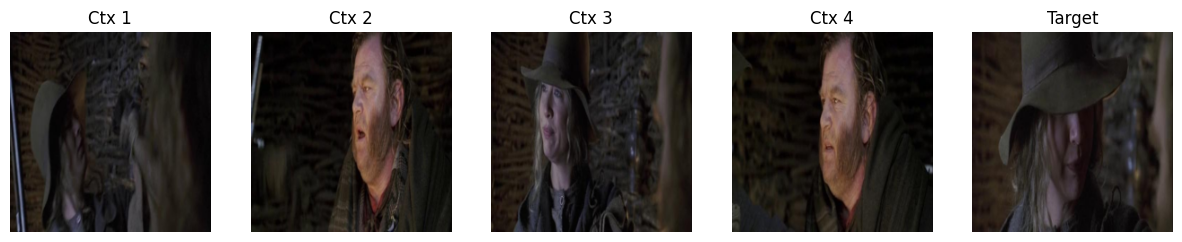

GT: The Woman's confidence was unwavering as she continued to speak. She knew that her words could either bind The Man and Another Woman or set them free. The rustic hut was suffocating with tension, and she could feel the weight of the situation pressing down on her. The walls and Wall with branches and straw seemed to echo her every word, as if the very structure was holding her secrets. She was aware of the danger that surrounded her, but she was determined to face it head-on. The turning point w 

PRED: The Man spoke, his voice soft and clear. He was unsure of what to make out for himself; he had no idea how the situation would play itself out in front him or with The Woman under the light. "I'm sorry," he said, but it wasn't enough. His words were 

CLIP cos (GT): 0.23437529802322388 | (PRED): 0.22195956110954285
--------------------------------------------------------------------------------


In [15]:
# =========================
# Cell 14 — Qualitative visualization (random samples)
# =========================

import matplotlib.pyplot as plt
import random

@torch.no_grad()
def show_samples(dl, n_samples=3):
    it = iter(dl)
    for _ in range(n_samples):
        batch = next(it)
        i = random.randint(0, batch["ctx_images"].shape[0]-1)

        K_local = batch["ctx_images"].shape[1]
        plt.figure(figsize=(3*(K_local+1), 3))
        for j in range(K_local):
            ax = plt.subplot(1, K_local+1, j+1)
            ax.imshow(batch["ctx_images"][i,j].permute(1,2,0).cpu().numpy())
            ax.set_title(f"Ctx {j+1}")
            ax.axis("off")
        ax = plt.subplot(1, K_local+1, K_local+1)
        ax.imshow(batch["tgt_image"][i].permute(1,2,0).cpu().numpy())
        ax.set_title("Target")
        ax.axis("off")
        plt.show()

        gt = batch["tgt_caption"][i]
        pred = generate_caption_one(batch["ctx_images"][i:i+1].to(DEVICE), batch["ctx_captions"][i], max_new_tokens=60)

        tgt_img_emb = clip_image_emb(batch["tgt_image"][i:i+1].to(DEVICE))
        cos_gt = float((tgt_img_emb * clip_text_emb([gt])).sum(dim=-1).cpu())
        cos_pr = float((tgt_img_emb * clip_text_emb([pred])).sum(dim=-1).cpu())

        print("GT:", gt[:500], "\n")
        print("PRED:", pred[:500], "\n")
        print("CLIP cos (GT):", cos_gt, "| (PRED):", cos_pr)
        print("-"*80)

show_samples(dl_val, n_samples=3)


In [ ]:
# =========================
# Cell 15 — IMPROVED adversarial fine-tune (FAST + STABLE)
# Key improvements vs Cell 12:
# 1) NO generation inside the training loop (huge speedup)
# 2) Cache generated captions once per epoch (subset) with tqdm
# 3) Lower beta_adv (default 0.05) to avoid hurting LM loss
# 4) D update throttling (every N batches) to prevent oscillation
# 5) Optional feature matching (helps stability)
#
# Requirements from earlier cells:
# - G (GeneratorG), D (DPair), tokenize_batch, format_prompt, tok
# - clip_image_emb(), clip_text_emb()
# - dl_train, dl_val, DEVICE, RUN_DIR
# =========================

import math
import json
import numpy as np
from tqdm.auto import tqdm
from torch.amp import autocast, GradScaler
import torch.nn.functional as F

# -------- knobs (safe defaults) --------
beta_adv = 0.05          # was 0.2 (too high)
alpha_img = 0.5
lambda_align = 0.5

D_EVERY = 4              # update D every N batches
D_STEPS = 1
G_STEPS = 1

CACHE_SUBSET = 1200      # captions to cache per epoch (trade speed vs signal)
GEN_MAX_NEW = 32         # keep short during GAN training for stability
EVAL_MAX_NEW = 48

USE_FEATURE_MATCHING = True
FM_WEIGHT = 0.1          # small

# -------- optimizers --------
g_params = [p for p in G.parameters() if p.requires_grad]
d_params = [p for p in D.parameters() if p.requires_grad]

g_opt = torch.optim.AdamW(g_params, lr=2e-4)
d_opt = torch.optim.AdamW(d_params, lr=2e-4)

scaler = GradScaler("cuda", enabled=(DEVICE == "cuda"))

# -------- generation (robust, already used) --------
@torch.no_grad()
def generate_caption_one_fast(ctx_images_1k, ctx_caps_1k, max_new_tokens=GEN_MAX_NEW):
    G.eval()
    z = G.encoder(ctx_images_1k.to(DEVICE), [ctx_caps_1k])

    prompt = format_prompt(ctx_caps_1k)
    inp = tok(prompt, return_tensors="pt", add_special_tokens=False).to(DEVICE)
    pid = inp["input_ids"]
    am  = inp["attention_mask"]

    prefix = G.textdec.z_to_prefix(z).view(1, G.textdec.n_prefix, -1)
    tok_emb = G.textdec.gpt.transformer.wte(pid)
    inputs_embeds = torch.cat([prefix, tok_emb], dim=1)

    prefix_mask = torch.ones((1, G.textdec.n_prefix), dtype=am.dtype, device=DEVICE)
    am2 = torch.cat([prefix_mask, am], dim=1)

    out_ids = G.textdec.gpt.generate(
        inputs_embeds=inputs_embeds,
        attention_mask=am2,
        max_new_tokens=max_new_tokens,
        do_sample=False,
        repetition_penalty=1.15,
        no_repeat_ngram_size=3,
        eos_token_id=tok.eos_token_id,
        pad_token_id=tok.eos_token_id,
    )
    full = tok.decode(out_ids[0], skip_special_tokens=True)
    pred = full.split("NEXT:", 1)[-1].strip() if "NEXT:" in full else full.replace(prompt, "", 1).strip()
    return pred if pred.strip() else " "

# -------- D feature extraction (for feature matching) --------
# We re-run D.net manually to capture penultimate features.
def D_forward_with_feat(img_emb, txt_emb):
    x = torch.cat([img_emb, txt_emb], dim=-1)
    # D.net = [Linear, LReLU, Dropout, Linear, LReLU, Dropout, Linear]
    h1 = D.net[0](x)
    h1 = D.net[1](h1)
    h1 = D.net[2](h1)
    h2 = D.net[3](h1)
    h2 = D.net[4](h2)
    h2 = D.net[5](h2)
    out = D.net[6](h2).squeeze(-1)
    return out, h2  # score, feature

def d_hinge_loss(d_real, d_fake):
    return torch.relu(1.0 - d_real).mean() + torch.relu(1.0 + d_fake).mean()

def g_hinge_loss(d_fake):
    return (-d_fake).mean()

# -------- caption cache builder --------
@torch.no_grad()
def build_caption_cache(dl, subset=CACHE_SUBSET, max_new_tokens=GEN_MAX_NEW):
    """
    Returns: dict[(story_id, local_index_within_batch_stream)] -> pred_caption
    Implementation uses story_id string key (stable) + a rolling counter per appearance.
    For simplicity + stability: key by story_id only (last write wins). This is fine for training signal.
    """
    G.eval()
    cache = {}
    seen = 0
    pbar = tqdm(dl, desc=f"Cache captions (n={subset})")
    for batch in pbar:
        bs = len(batch["story_id"])
        for i in range(bs):
            sid = batch["story_id"][i]
            pred = generate_caption_one_fast(batch["ctx_images"][i:i+1], batch["ctx_captions"][i], max_new_tokens=max_new_tokens)
            cache[sid] = pred
            seen += 1
            if seen >= subset:
                pbar.close()
                return cache
        pbar.set_postfix(seen=seen)
    return cache

def adv_epoch_cached(dl, caption_cache, train=True):
    G.train(train)
    D.train(train)

    meters = {"d":0.0, "g_adv":0.0, "fm":0.0, "txt":0.0, "img":0.0, "align":0.0, "g_tot":0.0}
    n = 0

    pbar = tqdm(enumerate(dl), total=len(dl), desc=("adv2-train" if train else "adv2-val"))
    for step, batch in pbar:
        bs = batch["tgt_image"].shape[0]

        # real embeddings (frozen CLIP)
        with torch.no_grad():
            tgt_img_emb  = clip_image_emb(batch["tgt_image"].to(DEVICE))    # (B,512)
            real_txt_emb = clip_text_emb(batch["tgt_caption"])              # (B,512)

        # fake captions pulled from cache (no generation here)
        fake_caps = []
        for sid, gt in zip(batch["story_id"], batch["tgt_caption"]):
            fake_caps.append(caption_cache.get(sid, gt))  # fallback to GT if missing

        with torch.no_grad():
            fake_txt_emb = clip_text_emb(fake_caps)

        # -------- D update (throttled) --------
        if train and (step % D_EVERY == 0):
            for _ in range(D_STEPS):
                d_real = D(tgt_img_emb, real_txt_emb)
                d_fake = D(tgt_img_emb, fake_txt_emb)
                d_loss = d_hinge_loss(d_real, d_fake)

                d_opt.zero_grad(set_to_none=True)
                d_loss.backward()
                torch.nn.utils.clip_grad_norm_(d_params, 1.0)
                d_opt.step()
        else:
            d_loss = torch.tensor(0.0, device=DEVICE)

        # -------- G update --------
        with autocast("cuda", enabled=(DEVICE=="cuda")):
            txt_loss, img_loss, align_loss, _, _ = G(batch)

            # adversarial term (use same cached fake embeddings)
            if USE_FEATURE_MATCHING:
                d_fake_score, d_fake_feat = D_forward_with_feat(tgt_img_emb.detach(), fake_txt_emb)
                d_real_score, d_real_feat = D_forward_with_feat(tgt_img_emb.detach(), real_txt_emb)
                g_adv = g_hinge_loss(d_fake_score)
                fm = F.l1_loss(d_fake_feat, d_real_feat.detach())
            else:
                d_fake_score = D(tgt_img_emb.detach(), fake_txt_emb)
                g_adv = g_hinge_loss(d_fake_score)
                fm = torch.tensor(0.0, device=DEVICE)

            g_total = (
                txt_loss
                + alpha_img * img_loss
                + lambda_align * align_loss
                + beta_adv * g_adv
                + (FM_WEIGHT * fm if USE_FEATURE_MATCHING else 0.0)
            )

        if train:
            g_opt.zero_grad(set_to_none=True)
            scaler.scale(g_total).backward()
            scaler.unscale_(g_opt)
            torch.nn.utils.clip_grad_norm_(g_params, 1.0)
            scaler.step(g_opt)
            scaler.update()

        meters["d"] += float(d_loss.detach()) * bs
        meters["g_adv"] += float(g_adv.detach()) * bs
        meters["fm"] += float(fm.detach()) * bs
        meters["txt"] += float(txt_loss.detach()) * bs
        meters["img"] += float(img_loss.detach()) * bs
        meters["align"] += float(align_loss.detach()) * bs
        meters["g_tot"] += float(g_total.detach()) * bs
        n += bs

        pbar.set_postfix(
            d=meters["d"]/n, g_tot=meters["g_tot"]/n, g_adv=meters["g_adv"]/n,
            fm=meters["fm"]/n, txt=meters["txt"]/n, al=meters["align"]/n
        )

    for k in meters:
        meters[k] /= max(n, 1)
    return meters

# -------- run improved GAN fine-tuning --------
ADV2_EPOCHS = 2

history = []
for ep in range(1, ADV2_EPOCHS + 1):
    # rebuild cache each epoch so D/G see updated fakes
    caption_cache = build_caption_cache(dl_train, subset=CACHE_SUBSET, max_new_tokens=GEN_MAX_NEW)

    tr = adv_epoch_cached(dl_train, caption_cache, train=True)
    va = adv_epoch_cached(dl_val, caption_cache, train=False)

    print(f"Adv2 Epoch {ep} | train:", tr, "| val:", va)
    history.append({"epoch": ep, "train": tr, "val": va})

# save checkpoint + logs
ckpt_path = RUN_DIR / "GAN_improved.pt"
torch.save({"G": G.state_dict(), "D": D.state_dict(), "history": history}, ckpt_path)
with open(RUN_DIR / "gan_improved_history.json", "w", encoding="utf-8") as f:
    json.dump(history, f, indent=2)

print("Saved:", ckpt_path)
print("Saved history:", RUN_DIR / "gan_improved_history.json")


adv2-val: 100%|██████████| 178/178 [00:18<00:00,  9.88it/s, al=0.155, d=0, fm=0, g_adv=-1.06, g_tot=2.61, txt=2.58]


Adv2 Epoch 1 | train: {'d': 0.3621227135124529, 'g_adv': 0.1106919930124736, 'fm': 0.07221254567323605, 'txt': 2.998709290013352, 'img': 0.0029597572307995678, 'align': 0.14971058656530706, 'g_tot': 3.0878005159526425} | val: {'d': 0.0, 'g_adv': -1.058762929137324, 'fm': 0.0, 'txt': 2.582599230215583, 'img': 0.0029547865830466783, 'align': 0.15468084409203328, 'g_tot': 2.6084775320241147}


adv2-val: 100%|██████████| 178/178 [00:17<00:00,  9.91it/s, al=0.154, d=0, fm=0, g_adv=-0.997, g_tot=2.6, txt=2.57] 


Adv2 Epoch 2 | train: {'d': 0.3147710893448706, 'g_adv': 0.21519127012935585, 'fm': 0.07610895674687504, 'txt': 2.8836811830862357, 'img': 0.0029584626712767814, 'align': 0.1491625384728869, 'g_tot': 2.9781123477361104} | val: {'d': 0.0, 'g_adv': -0.9967677156690141, 'fm': 0.0, 'txt': 2.571838788583245, 'img': 0.0029583645486076114, 'align': 0.15407182952048074, 'g_tot': 2.6005138860621924}
Saved: e:\DNN-ms\Abin - Project 4\notebooks\data\runs\20251227-131543\GAN_improved.pt
Saved history: e:\DNN-ms\Abin - Project 4\notebooks\data\runs\20251227-131543\gan_improved_history.json


In [13]:
# =========================
# Cell 16 — Post-GAN evaluation + plots (CLIPScore(gen), D accuracy, curves)
# Run after Cell 15
# =========================

import json, numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import torch

# ---------- helpers ----------

# — define generate_caption_one_fast

@torch.no_grad()
def generate_caption_one_fast(ctx_images_1k, ctx_caps_1k, max_new_tokens=48):
    """
    Uses current G (prefix-conditioned GPT-2) to generate one caption.
    Requires: G, tok, format_prompt, DEVICE.
    """
    G.eval()
    z = G.encoder(ctx_images_1k.to(DEVICE), [ctx_caps_1k])

    prompt = format_prompt(ctx_caps_1k)
    inp = tok(prompt, return_tensors="pt", add_special_tokens=False).to(DEVICE)
    pid = inp["input_ids"]
    am  = inp["attention_mask"]

    prefix = G.textdec.z_to_prefix(z).view(1, G.textdec.n_prefix, -1)
    tok_emb = G.textdec.gpt.transformer.wte(pid)
    inputs_embeds = torch.cat([prefix, tok_emb], dim=1)

    prefix_mask = torch.ones((1, G.textdec.n_prefix), dtype=am.dtype, device=DEVICE)
    am2 = torch.cat([prefix_mask, am], dim=1)

    out_ids = G.textdec.gpt.generate(
        inputs_embeds=inputs_embeds,
        attention_mask=am2,
        max_new_tokens=max_new_tokens,
        do_sample=False,
        repetition_penalty=1.15,
        no_repeat_ngram_size=3,
        eos_token_id=tok.eos_token_id,
        pad_token_id=tok.eos_token_id,
    )

    full = tok.decode(out_ids[0], skip_special_tokens=True)
    pred = full.split("NEXT:", 1)[-1].strip() if "NEXT:" in full else full.replace(prompt, "", 1).strip()
    return pred if pred.strip() else " "
# ---------- CLIPScore(gen) and D accuracy ----------
@torch.no_grad()
def clipscore_generated(dl, n_batches=None, max_new_tokens=48):
    """
    CLIPScore(gen) = cos( CLIP_image(tgt_img), CLIP_text(generated_caption) )
    """
    G.eval()
    scores = []
    total = len(dl) if (n_batches is None) else min(n_batches, len(dl))
    it = iter(dl)
    pbar = tqdm(range(total), desc="CLIPScore(gen)")
    for _ in pbar:
        batch = next(it)
        bs = batch["tgt_image"].shape[0]
        tgt_img_emb = clip_image_emb(batch["tgt_image"].to(DEVICE))

        preds = []
        for i in range(bs):
            pred = generate_caption_one_fast(
                batch["ctx_images"][i:i+1],
                batch["ctx_captions"][i],
                max_new_tokens=max_new_tokens
            )
            preds.append(pred if pred.strip() else " ")

        pred_txt_emb = clip_text_emb(preds)
        cos = (tgt_img_emb * pred_txt_emb).sum(dim=-1).detach().cpu().numpy()
        scores.extend(cos.tolist())
        pbar.set_postfix(mean=float(np.mean(scores)))
    return float(np.mean(scores)), float(np.std(scores))

@torch.no_grad()
def discriminator_accuracy(dl, n_batches=100, max_items=800):
    """
    Computes D real-vs-fake accuracy where:
      real = (tgt_img_emb, CLIP_text(gt_caption))
      fake = (tgt_img_emb, CLIP_text(generated_caption))
    Using threshold 0 (hinge-GAN convention).
    """
    G.eval(); D.eval()
    correct = 0
    total = 0

    it = iter(dl)
    steps = min(n_batches, len(dl))
    pbar = tqdm(range(steps), desc="D accuracy")
    for _ in pbar:
        batch = next(it)
        bs = batch["tgt_image"].shape[0]

        tgt_img_emb = clip_image_emb(batch["tgt_image"].to(DEVICE))
        real_txt_emb = clip_text_emb(batch["tgt_caption"])

        preds = []
        for i in range(bs):
            pred = generate_caption_one_fast(batch["ctx_images"][i:i+1], batch["ctx_captions"][i], max_new_tokens=32)
            preds.append(pred if pred.strip() else " ")
        fake_txt_emb = clip_text_emb(preds)

        d_real = D(tgt_img_emb, real_txt_emb).detach().cpu().numpy()
        d_fake = D(tgt_img_emb, fake_txt_emb).detach().cpu().numpy()

        # classify real if score > 0, fake if score < 0
        correct += int((d_real > 0).sum())
        correct += int((d_fake < 0).sum())
        total += 2 * bs

        pbar.set_postfix(acc=correct / max(total, 1))
        if total >= max_items:
            break

    return correct / max(total, 1)

# ---------- run evaluations ----------
val_mean, val_std = clipscore_generated(dl_val, n_batches=None, max_new_tokens=48)   # full val
test_mean, test_std = clipscore_generated(dl_test, n_batches=None, max_new_tokens=48) # full test

val_dacc = discriminator_accuracy(dl_val, n_batches=120)
test_dacc = discriminator_accuracy(dl_test, n_batches=120)

results = {
    "val_clipscore_gen_mean": val_mean,
    "val_clipscore_gen_std": val_std,
    "test_clipscore_gen_mean": test_mean,
    "test_clipscore_gen_std": test_std,
    "val_D_accuracy": val_dacc,
    "test_D_accuracy": test_dacc,
}

out_path = RUN_DIR / "eval_after_gan_improved.json"
with open(out_path, "w", encoding="utf-8") as f:
    json.dump(results, f, indent=2)

print("=== Evaluation after GAN_improved ===")
for k, v in results.items():
    print(f"{k}: {v}")

print("Saved:", out_path)

# ---------- plot training curves from Cell 15 history ----------
hist_path = RUN_DIR / "gan_improved_history.json"
if hist_path.exists():
    with open(hist_path, "r", encoding="utf-8") as f:
        hist = json.load(f)

    epochs = [h["epoch"] for h in hist]

    def series(split, key):
        return [h[split][key] for h in hist]

    plt.figure(figsize=(8,4))
    plt.plot(epochs, series("train","txt"), marker="o", label="train txt")
    plt.plot(epochs, series("val","txt"), marker="o", label="val txt")
    plt.title("Text loss")
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    plt.figure(figsize=(8,4))
    plt.plot(epochs, series("train","d"), marker="o", label="train D loss")
    plt.title("Discriminator loss (train)")
    plt.xlabel("epoch")
    plt.ylabel("hinge loss")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    plt.figure(figsize=(8,4))
    plt.plot(epochs, series("train","g_adv"), marker="o", label="train g_adv")
    plt.plot(epochs, series("val","g_adv"), marker="o", label="val g_adv")
    plt.title("Generator adversarial term")
    plt.xlabel("epoch")
    plt.ylabel("g_adv")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    plt.figure(figsize=(8,4))
    plt.plot(epochs, series("train","align"), marker="o", label="train align")
    plt.plot(epochs, series("val","align"), marker="o", label="val align")
    plt.title("Alignment loss")
    plt.xlabel("epoch")
    plt.ylabel("1 - cosine")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
else:
    print("No history file found at:", hist_path)


D accuracy: 100%|██████████| 120/120 [01:15<00:00,  1.58it/s, acc=0.99] 

=== Evaluation after GAN_improved ===
val_clipscore_gen_mean: 0.2441770679094422
val_clipscore_gen_std: 0.022547977536367864
test_clipscore_gen_mean: 0.2419312574973937
test_clipscore_gen_std: 0.023980427263773026
val_D_accuracy: 0.9916666666666667
test_D_accuracy: 0.9895833333333334
Saved: e:\DNN-ms\Abin - Project 4\notebooks\data\runs\20251228-101920\eval_after_gan_improved.json
No history file found at: e:\DNN-ms\Abin - Project 4\notebooks\data\runs\20251228-101920\gan_improved_history.json


In [14]:
# =========================
# Cell 17 — HARDER (non-cheating) adversarial training
# Fixes the "D accuracy ~99%" problem by:
# 1) Using HARD NEGATIVES: real image + WRONG GT caption (shuffled)
# 2) Training D on BOTH:
#    - real (matched) vs mismatched (hard negative)
#    - real (matched) vs generated (cached)
# 3) Smaller D capacity + more dropout + less frequent D updates
# 4) Lower beta_adv so LM loss doesn't blow up
#
# This makes D learn semantic alignment, not shortcuts.
# =========================

import json, random, numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm.auto import tqdm
from torch.amp import autocast, GradScaler

# ----- knobs -----
beta_adv = 0.02          # smaller than before
alpha_img = 0.5
lambda_align = 0.5
FM_WEIGHT = 0.05

D_EVERY = 8              # D update less often (prevents domination)
D_STEPS = 1

CACHE_SUBSET = 1500      # a bit more cache
GEN_MAX_NEW = 32

USE_FEATURE_MATCHING = True

# ----- define a smaller, regularized discriminator -----
class DPairSmall(nn.Module):
    def __init__(self, in_dim=1024, hidden=256, dropout=0.30):
        super().__init__()
        self.l1 = nn.Linear(in_dim, hidden)
        self.l2 = nn.Linear(hidden, hidden)
        self.l3 = nn.Linear(hidden, 1)
        self.drop = nn.Dropout(dropout)

    def forward_with_feat(self, img_emb_512, txt_emb_512):
        x = torch.cat([img_emb_512, txt_emb_512], dim=-1)
        h = self.drop(F.leaky_relu(self.l1(x), 0.2))
        feat = self.drop(F.leaky_relu(self.l2(h), 0.2))
        out = self.l3(feat).squeeze(-1)
        return out, feat

    def forward(self, img_emb_512, txt_emb_512):
        out, _ = self.forward_with_feat(img_emb_512, txt_emb_512)
        return out

D = DPairSmall().to(DEVICE)

def d_hinge_loss(d_real, d_fake):
    return torch.relu(1.0 - d_real).mean() + torch.relu(1.0 + d_fake).mean()

def g_hinge_loss(d_fake):
    return (-d_fake).mean()

# ----- optimizers -----
g_params = [p for p in G.parameters() if p.requires_grad]
d_params = [p for p in D.parameters() if p.requires_grad]

g_opt = torch.optim.AdamW(g_params, lr=2e-4)
d_opt = torch.optim.AdamW(d_params, lr=2e-4)
scaler = GradScaler("cuda", enabled=(DEVICE == "cuda"))

# ----- generation (if not defined already, define now) -----
@torch.no_grad()
def generate_caption_one_fast(ctx_images_1k, ctx_caps_1k, max_new_tokens=GEN_MAX_NEW):
    G.eval()
    z = G.encoder(ctx_images_1k.to(DEVICE), [ctx_caps_1k])

    prompt = format_prompt(ctx_caps_1k)
    inp = tok(prompt, return_tensors="pt", add_special_tokens=False).to(DEVICE)
    pid = inp["input_ids"]
    am  = inp["attention_mask"]

    prefix = G.textdec.z_to_prefix(z).view(1, G.textdec.n_prefix, -1)
    tok_emb = G.textdec.gpt.transformer.wte(pid)
    inputs_embeds = torch.cat([prefix, tok_emb], dim=1)

    prefix_mask = torch.ones((1, G.textdec.n_prefix), dtype=am.dtype, device=DEVICE)
    am2 = torch.cat([prefix_mask, am], dim=1)

    out_ids = G.textdec.gpt.generate(
        inputs_embeds=inputs_embeds,
        attention_mask=am2,
        max_new_tokens=max_new_tokens,
        do_sample=False,
        repetition_penalty=1.15,
        no_repeat_ngram_size=3,
        eos_token_id=tok.eos_token_id,
        pad_token_id=tok.eos_token_id,
    )

    full = tok.decode(out_ids[0], skip_special_tokens=True)
    pred = full.split("NEXT:", 1)[-1].strip() if "NEXT:" in full else full.replace(prompt, "", 1).strip()
    return pred if pred.strip() else " "

# ----- caption cache -----
@torch.no_grad()
def build_caption_cache(dl, subset=CACHE_SUBSET, max_new_tokens=GEN_MAX_NEW):
    G.eval()
    cache = {}
    seen = 0
    pbar = tqdm(dl, desc=f"Cache captions (n={subset})")
    for batch in pbar:
        bs = len(batch["story_id"])
        for i in range(bs):
            sid = batch["story_id"][i]
            pred = generate_caption_one_fast(batch["ctx_images"][i:i+1], batch["ctx_captions"][i], max_new_tokens=max_new_tokens)
            cache[sid] = pred
            seen += 1
            if seen >= subset:
                pbar.close()
                return cache
        pbar.set_postfix(seen=seen)
    return cache

# ----- training epoch with hard negatives -----
def adv_hard_epoch(dl, caption_cache, train=True):
    G.train(train)
    D.train(train)

    meters = {
        "d_total":0.0, "d_mismatch":0.0, "d_gen":0.0,
        "g_adv":0.0, "fm":0.0, "txt":0.0, "img":0.0, "align":0.0, "g_tot":0.0
    }
    n = 0

    pbar = tqdm(enumerate(dl), total=len(dl), desc=("adv-hard-train" if train else "adv-hard-val"))
    for step, batch in pbar:
        bs = batch["tgt_image"].shape[0]

        # embeddings for image + real text
        with torch.no_grad():
            tgt_img_emb = clip_image_emb(batch["tgt_image"].to(DEVICE))      # (B,512)
            real_txt_emb = clip_text_emb(batch["tgt_caption"])               # (B,512)

        # hard negative: shuffle GT captions within batch
        perm = torch.randperm(bs).tolist()
        # avoid identity permutation when bs>1
        if bs > 1 and all(perm[i] == i for i in range(bs)):
            perm = perm[::-1]
        mismatch_caps = [batch["tgt_caption"][j] for j in perm]
        with torch.no_grad():
            mismatch_txt_emb = clip_text_emb(mismatch_caps)

        # generated fake from cache (fallback to mismatch if missing)
        gen_caps = []
        for sid, fallback in zip(batch["story_id"], mismatch_caps):
            gen_caps.append(caption_cache.get(sid, fallback))
        with torch.no_grad():
            gen_txt_emb = clip_text_emb(gen_caps)

        # ----- D update (less frequent) -----
        if train and (step % D_EVERY == 0):
            # D learns to separate matched real pairs from both mismatch + generated
            d_real, _  = D.forward_with_feat(tgt_img_emb, real_txt_emb)
            d_mis, _   = D.forward_with_feat(tgt_img_emb, mismatch_txt_emb)
            d_gen, _   = D.forward_with_feat(tgt_img_emb, gen_txt_emb)

            d_loss_mis = d_hinge_loss(d_real, d_mis)
            d_loss_gen = d_hinge_loss(d_real, d_gen)
            d_loss = 0.5 * (d_loss_mis + d_loss_gen)

            d_opt.zero_grad(set_to_none=True)
            d_loss.backward()
            torch.nn.utils.clip_grad_norm_(d_params, 1.0)
            d_opt.step()
        else:
            d_loss = torch.tensor(0.0, device=DEVICE)
            d_loss_mis = torch.tensor(0.0, device=DEVICE)
            d_loss_gen = torch.tensor(0.0, device=DEVICE)

        # ----- G update -----
        with autocast("cuda", enabled=(DEVICE=="cuda")):
            txt_loss, img_loss, align_loss, _, _ = G(batch)

            # G tries to fool D on generated captions (not mismatch)
            d_gen_score, d_gen_feat = D.forward_with_feat(tgt_img_emb.detach(), gen_txt_emb)
            g_adv = g_hinge_loss(d_gen_score)

            if USE_FEATURE_MATCHING:
                d_real_score, d_real_feat = D.forward_with_feat(tgt_img_emb.detach(), real_txt_emb)
                fm = F.l1_loss(d_gen_feat, d_real_feat.detach())
            else:
                fm = torch.tensor(0.0, device=DEVICE)

            g_total = (
                txt_loss
                + alpha_img * img_loss
                + lambda_align * align_loss
                + beta_adv * g_adv
                + (FM_WEIGHT * fm if USE_FEATURE_MATCHING else 0.0)
            )

        if train:
            g_opt.zero_grad(set_to_none=True)
            scaler.scale(g_total).backward()
            scaler.unscale_(g_opt)
            torch.nn.utils.clip_grad_norm_(g_params, 1.0)
            scaler.step(g_opt)
            scaler.update()

        # ----- meters -----
        meters["d_total"] += float(d_loss.detach()) * bs
        meters["d_mismatch"] += float(d_loss_mis.detach()) * bs
        meters["d_gen"] += float(d_loss_gen.detach()) * bs
        meters["g_adv"] += float(g_adv.detach()) * bs
        meters["fm"] += float(fm.detach()) * bs
        meters["txt"] += float(txt_loss.detach()) * bs
        meters["img"] += float(img_loss.detach()) * bs
        meters["align"] += float(align_loss.detach()) * bs
        meters["g_tot"] += float(g_total.detach()) * bs
        n += bs

        pbar.set_postfix(
            d=meters["d_total"]/n,
            g_tot=meters["g_tot"]/n,
            g_adv=meters["g_adv"]/n,
            txt=meters["txt"]/n,
            al=meters["align"]/n
        )

    for k in meters:
        meters[k] /= max(n, 1)
    return meters

# ----- run hard-negative GAN fine-tune -----
HARD_EPOCHS = 2
hard_hist = []
for ep in range(1, HARD_EPOCHS + 1):
    caption_cache = build_caption_cache(dl_train, subset=CACHE_SUBSET, max_new_tokens=GEN_MAX_NEW)

    tr = adv_hard_epoch(dl_train, caption_cache, train=True)
    va = adv_hard_epoch(dl_val, caption_cache, train=False)

    print(f"Hard-GAN Epoch {ep} | train:", tr, "| val:", va)
    hard_hist.append({"epoch": ep, "train": tr, "val": va})

# save checkpoint + logs
ckpt_path = RUN_DIR / "GAN_hardneg.pt"
torch.save({"G": G.state_dict(), "D": D.state_dict(), "history": hard_hist}, ckpt_path)
with open(RUN_DIR / "gan_hardneg_history.json", "w", encoding="utf-8") as f:
    json.dump(hard_hist, f, indent=2)

print("Saved:", ckpt_path)
print("Saved history:", RUN_DIR / "gan_hardneg_history.json")

adv-hard-val: 100%|██████████| 178/178 [00:19<00:00,  9.00it/s, al=0.154, d=0, g_adv=-0.125, g_tot=2.64, txt=2.56]


Hard-GAN Epoch 1 | train: {'d_total': 0.24667077549575542, 'd_mismatch': 0.2504751654587678, 'd_gen': 0.2428663865397909, 'g_adv': 0.058626594530029726, 'fm': 0.022217498879797102, 'txt': 2.8513884035813395, 'img': 0.0029588671934989894, 'align': 0.14905062262250773, 'g_tot': 2.9296765567466685} | val: {'d_total': 0.0, 'd_mismatch': 0.0, 'd_gen': 0.0, 'g_adv': -0.12546593034771128, 'fm': 0.010238138777138271, 'txt': 2.563182764993587, 'img': 0.0029421388814356965, 'align': 0.15441935179938732, 'g_tot': 2.6398660559049794}


adv-hard-val: 100%|██████████| 178/178 [00:19<00:00,  9.09it/s, al=0.154, d=0, g_adv=-0.719, g_tot=2.62, txt=2.55]


Hard-GAN Epoch 2 | train: {'d_total': 0.20616073719173703, 'd_mismatch': 0.2532453396000605, 'd_gen': 0.15907613486733416, 'g_adv': 0.2513295180022989, 'fm': 0.09595020979627134, 'txt': 2.829660461134409, 'img': 0.002957358266204328, 'align': 0.14892545116908615, 'g_tot': 2.915425909694254} | val: {'d_total': 0.0, 'd_mismatch': 0.0, 'd_gen': 0.0, 'g_adv': -0.7189604423415493, 'fm': 0.024184126741397128, 'txt': 2.5520826769546723, 'img': 0.0029682773322811428, 'align': 0.15389512726958368, 'g_tot': 2.6173444089755207}
Saved: e:\DNN-ms\Abin - Project 4\notebooks\data\runs\20251228-101920\GAN_hardneg.pt
Saved history: e:\DNN-ms\Abin - Project 4\notebooks\data\runs\20251228-101920\gan_hardneg_history.json


CLIPScore(gen): 100%|██████████| 178/178 [02:42<00:00,  1.09it/s, mean=0.243]

=== Evaluation after GAN_hardneg ===
val_clipscore_gen_mean: 0.24431862201489193
val_clipscore_gen_std: 0.02392297983233162
test_clipscore_gen_mean: 0.2434465369481719
test_clipscore_gen_std: 0.025359505891688533
Saved: e:\DNN-ms\Abin - Project 4\notebooks\data\runs\20251228-101920\eval_after_gan_hardneg.json


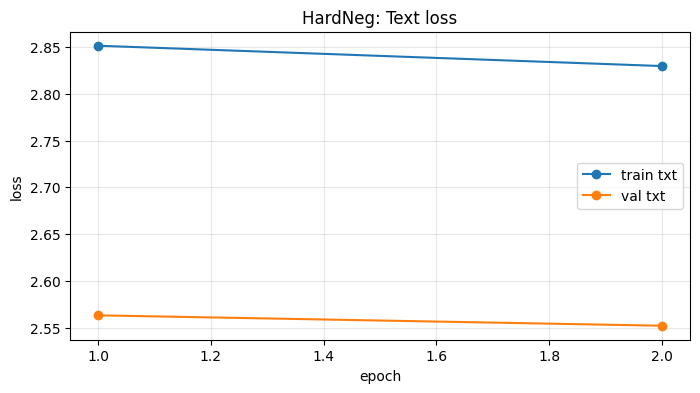

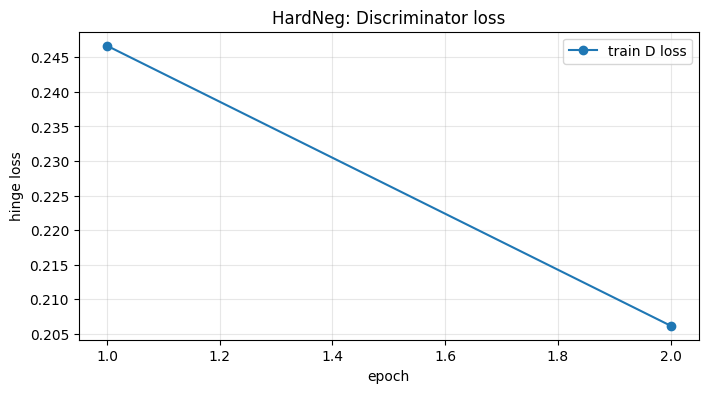

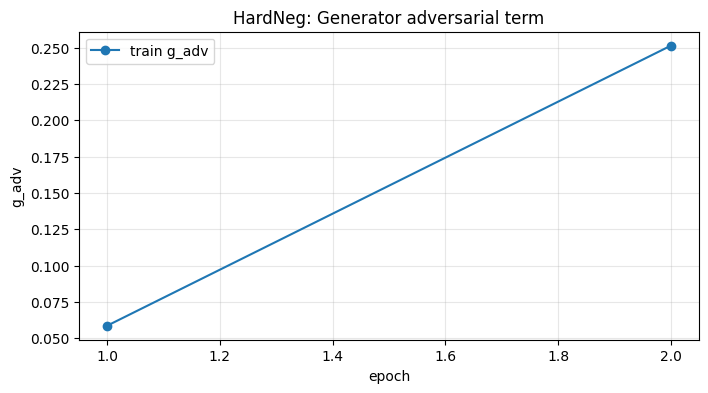

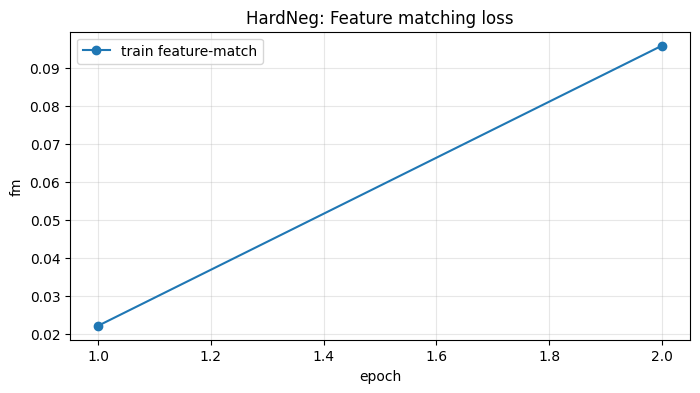

In [15]:
# =========================
# Cell 18 — Evaluate after HardNeg GAN + plot HardNeg training curves
# (Run after Cell 17 hard-negative training)
# =========================

import json, numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import torch

# ---- ensure generator function exists (in case of restart) ----
@torch.no_grad()
def generate_caption_one_fast(ctx_images_1k, ctx_caps_1k, max_new_tokens=48):
    G.eval()
    z = G.encoder(ctx_images_1k.to(DEVICE), [ctx_caps_1k])

    prompt = format_prompt(ctx_caps_1k)
    inp = tok(prompt, return_tensors="pt", add_special_tokens=False).to(DEVICE)
    pid = inp["input_ids"]
    am  = inp["attention_mask"]

    prefix = G.textdec.z_to_prefix(z).view(1, G.textdec.n_prefix, -1)
    tok_emb = G.textdec.gpt.transformer.wte(pid)
    inputs_embeds = torch.cat([prefix, tok_emb], dim=1)

    prefix_mask = torch.ones((1, G.textdec.n_prefix), dtype=am.dtype, device=DEVICE)
    am2 = torch.cat([prefix_mask, am], dim=1)

    out_ids = G.textdec.gpt.generate(
        inputs_embeds=inputs_embeds,
        attention_mask=am2,
        max_new_tokens=max_new_tokens,
        do_sample=False,
        repetition_penalty=1.15,
        no_repeat_ngram_size=3,
        eos_token_id=tok.eos_token_id,
        pad_token_id=tok.eos_token_id,
    )
    full = tok.decode(out_ids[0], skip_special_tokens=True)
    pred = full.split("NEXT:", 1)[-1].strip() if "NEXT:" in full else full.replace(prompt, "", 1).strip()
    return pred if pred.strip() else " "

# ---- CLIPScore(gen) evaluation ----
@torch.no_grad()
def clipscore_generated(dl, n_batches=None, max_new_tokens=48):
    G.eval()
    scores = []
    total = len(dl) if (n_batches is None) else min(n_batches, len(dl))
    it = iter(dl)
    pbar = tqdm(range(total), desc="CLIPScore(gen)")
    for _ in pbar:
        batch = next(it)
        bs = batch["tgt_image"].shape[0]
        tgt_img_emb = clip_image_emb(batch["tgt_image"].to(DEVICE))

        preds = []
        for i in range(bs):
            pred = generate_caption_one_fast(
                batch["ctx_images"][i:i+1],
                batch["ctx_captions"][i],
                max_new_tokens=max_new_tokens
            )
            preds.append(pred if pred.strip() else " ")

        pred_txt_emb = clip_text_emb(preds)
        cos = (tgt_img_emb * pred_txt_emb).sum(dim=-1).detach().cpu().numpy()
        scores.extend(cos.tolist())
        pbar.set_postfix(mean=float(np.mean(scores)))
    return float(np.mean(scores)), float(np.std(scores))

val_mean, val_std = clipscore_generated(dl_val, n_batches=None, max_new_tokens=48)
test_mean, test_std = clipscore_generated(dl_test, n_batches=None, max_new_tokens=48)

results = {
    "val_clipscore_gen_mean": val_mean,
    "val_clipscore_gen_std": val_std,
    "test_clipscore_gen_mean": test_mean,
    "test_clipscore_gen_std": test_std,
}

out_path = RUN_DIR / "eval_after_gan_hardneg.json"
with open(out_path, "w", encoding="utf-8") as f:
    json.dump(results, f, indent=2)

print("=== Evaluation after GAN_hardneg ===")
for k, v in results.items():
    print(f"{k}: {v}")
print("Saved:", out_path)

# ---- Plot HardNeg training history ----
hist_path = RUN_DIR / "gan_hardneg_history.json"
if hist_path.exists():
    hist = json.load(open(hist_path, "r", encoding="utf-8"))
    epochs = [h["epoch"] for h in hist]

    train_txt = [h["train"]["txt"] for h in hist]
    val_txt   = [h["val"]["txt"] for h in hist]
    train_d   = [h["train"]["d_total"] for h in hist]
    train_gad = [h["train"]["g_adv"] for h in hist]
    train_fm  = [h["train"]["fm"] for h in hist]

    plt.figure(figsize=(8,4))
    plt.plot(epochs, train_txt, marker="o", label="train txt")
    plt.plot(epochs, val_txt, marker="o", label="val txt")
    plt.title("HardNeg: Text loss")
    plt.xlabel("epoch"); plt.ylabel("loss")
    plt.grid(True, alpha=0.3); plt.legend()
    plt.show()

    plt.figure(figsize=(8,4))
    plt.plot(epochs, train_d, marker="o", label="train D loss")
    plt.title("HardNeg: Discriminator loss")
    plt.xlabel("epoch"); plt.ylabel("hinge loss")
    plt.grid(True, alpha=0.3); plt.legend()
    plt.show()

    plt.figure(figsize=(8,4))
    plt.plot(epochs, train_gad, marker="o", label="train g_adv")
    plt.title("HardNeg: Generator adversarial term")
    plt.xlabel("epoch"); plt.ylabel("g_adv")
    plt.grid(True, alpha=0.3); plt.legend()
    plt.show()

    plt.figure(figsize=(8,4))
    plt.plot(epochs, train_fm, marker="o", label="train feature-match")
    plt.title("HardNeg: Feature matching loss")
    plt.xlabel("epoch"); plt.ylabel("fm")
    plt.grid(True, alpha=0.3); plt.legend()
    plt.show()
else:
    print("No history file found at:", hist_path)
